In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


pd.plotting.register_matplotlib_converters()
%matplotlib inline


In [2]:
df_recent = pd.read_csv('../data/energy_recent_clean.csv', index_col = 'date')
df_past = pd.read_csv('../data/energy_past_clean.csv', index_col = 'date')

df_recent.set_index(pd.to_datetime(df_recent.index), inplace = True)
df_past.set_index(pd.to_datetime(df_past.index), inplace = True)

In [3]:
coal_pred = pd.read_csv("./data/Predictions_Coal")
ngas_pred = pd.read_csv("./data/Predictions_Natural_Gas")
other_pred = pd.read_csv("./data/Predictions_Other_Gases")
nuclear_pred = pd.read_csv("./data/Predictions_Nuclear")
petroleum_pred = pd.read_csv("./data/Predictions_Petroleum")
hydro_pred = pd.read_csv("./data/Predictions_Hydroelectric")
wind_pred = pd.read_csv("./data/Predictions_Wind")
geo_pred = pd.read_csv("./data/Predictions_Geothermal")
solar_pred = pd.read_csv("./data/Predictions_Solar")
bio_pred = pd.read_csv("./data/Predictions_Biomass")

In [4]:
features = [
    'Coal',
    'Natural Gas', 
    'Other Gases', 
    'Nuclear',
    'Conventional Hydroelectric Power', 
    'Wind',
    'Geo- thermal', 
    'Solar/PV', 
    'Biomass Total',
    'Petroleum', 
    'Renewable Total',
    'Nonrenewable Total', 
    'Total', 
    'Renewable Percentage',
    'Nonrenewable Percentage'
]

In [5]:
df_recent[features].head()

Coal  Natural Gas  Other Gases  Nuclear  \
date                                                      
2001-01-01  177287.0      42389.0        718.0  68707.0   
2001-02-01  149735.0      37967.0        676.0  61272.0   
2001-03-01  155269.0      44364.0        769.0  62141.0   
2001-04-01  140671.0      45843.0        698.0  56003.0   
2001-05-01  151593.0      50934.0        785.0  61512.0   

            Conventional Hydroelectric Power   Wind  Geo- thermal  Solar/PV  \
date                                                                          
2001-01-01                           18852.0  389.0        1229.0       0.0   
2001-02-01                           17473.0  431.0        1073.0       0.0   
2001-03-01                           20477.0  532.0        1190.0       0.0   
2001-04-01                           18013.0  685.0        1095.0       0.0   
2001-05-01                           19176.0  635.0        1071.0       0.0   

            Biomass Total  Petroleum  Renewable Total  Nonrenewable Total  \
date                                                                        
2001-01-01         4400.0    18112.0          24870.0            307213.0   
2001-02-01         3793.0    10342.0          22770.0            259992.0   
2001-03-01         4042.0    11733.0          26241.0            274276.0   
2001-04-01         4008.0    10864.0          23801.0            254079.0   
2001-05-01         3951.0    10390.0          24833.0            275214.0   

               Total  Renewable Percentage  Nonrenewable Percentage  
date                                                                 
2001-01-01  333075.0              0.074668                 0.922354  
2001-02-01  283634.0              0.080280                 0.916646  
2001-03-01  301448.0              0.087050                 0.909862  
2001-04-01  278837.0              0.085358                 0.911210  
2001-05-01  301033.0              0.082493                 0.914232

In [6]:
preds = [(coal_pred, 'coal'),
         (ngas_pred, 'ngas'), 
         (other_pred, 'other'), 
         (nuclear_pred, 'nuclear'), 
         (hydro_pred, 'hydro'), 
         (wind_pred, 'wind'), 
         (geo_pred, 'geo'), 
         (solar_pred, 'solar'), 
         (bio_pred, 'bio'), 
         (petroleum_pred, 'petroleum')]

In [7]:
preds[0][0].shape

(592, 18)

In [8]:
preds[0][0].tail()

Unnamed: 0          ds          trend  cap     yhat_lower    yhat_upper  \
587         587  2049-11-30 -127985.922746  100 -350224.306190  72371.658861   
588         588  2049-12-31 -128585.661490  100 -374442.946677  78864.441941   
589         589  2050-01-31 -129185.400233  100 -339026.033706  65801.994483   
590         590  2050-02-28 -129727.099744  100 -345935.223068  72231.470606   
591         591  2050-03-31 -130326.838487  100 -288633.462203  59276.343481   

       trend_lower   trend_upper  multiplicative_terms  \
587 -346120.560473  68876.284851              0.009454   
588 -347456.984203  68974.702886              0.073109   
589 -349212.729987  69159.104975             -0.034016   
590 -349641.166909  69325.661700             -0.016742   
591 -350958.861849  69510.063788             -0.182148   

     multiplicative_terms_lower  multiplicative_terms_upper    yearly  \
587                    0.009454                    0.009454  0.009454   
588                    0.073109                    0.073109  0.073109   
589                   -0.034016                   -0.034016 -0.034016   
590                   -0.016742                   -0.016742 -0.016742   
591                   -0.182148                   -0.182148 -0.182148   

     yearly_lower  yearly_upper  additive_terms  additive_terms_lower  \
587      0.009454      0.009454             0.0                   0.0   
588      0.073109      0.073109             0.0                   0.0   
589     -0.034016     -0.034016             0.0                   0.0   
590     -0.016742     -0.016742             0.0                   0.0   
591     -0.182148     -0.182148             0.0                   0.0   

     additive_terms_upper           yhat  
587                   0.0 -129195.947661  
588                   0.0 -137986.373485  
589                   0.0 -124791.080745  
590                   0.0 -127555.261317  
591                   0.0 -106588.047408

In [9]:
pred_lower = pd.DataFrame(index = pd.to_datetime(preds[0][0]['ds']))
pred_upper = pd.DataFrame(index = pd.to_datetime(preds[0][0]['ds']))
pred_mid = pd.DataFrame(index = pd.to_datetime(preds[0][0]['ds']))

In [10]:
pred_lower.shape

(592, 0)

In [11]:
pred_mid.shape

(592, 0)

In [12]:
pred_upper.shape

(592, 0)

In [13]:
for pred, name in preds:
    pred_lower[f'{name}'] = list(pred['yhat_lower'])
    pred_mid[f'{name}'] = list(pred['yhat'])
    pred_upper[f'{name}'] = list(pred['yhat_upper'])

In [14]:
pred_lower.head()

coal          ngas       other       nuclear  \
ds                                                                  
2001-01-01  162564.706108  36310.647367  695.455287  68483.776473   
2001-02-01  139827.058951  31215.362061  635.998206  58761.318008   
2001-03-01  136562.316334  35436.149937  757.562427  59773.673185   
2001-04-01  122219.961734  33732.136371  728.556880  53892.586171   
2001-05-01  137085.756881  38890.740287  746.285946  59797.200709   

                   hydro        wind          geo       solar          bio  \
ds                                                                           
2001-01-01  19542.094551 -429.180644  1175.626968 -699.585703  4194.384031   
2001-02-01  17035.109775 -588.341989  1036.302091 -715.003474  3741.458108   
2001-03-01  18902.100099 -321.620193  1148.656669 -677.636844  4046.376551   
2001-04-01  18999.205960 -333.588524  1078.524750 -685.267787  3816.202256   
2001-05-01  21587.607889 -491.905944  1121.176239 -665.821502  3942.369664   

               petroleum  
ds                        
2001-01-01  12505.352668  
2001-02-01   8255.179848  
2001-03-01   8636.745464  
2001-04-01   7851.011798  
2001-05-01   7817.749888

In [15]:
pred_mid.head()

coal          ngas       other       nuclear  \
ds                                                                  
2001-01-01  174042.011175  44483.564855  823.251575  70399.396255   
2001-02-01  150330.544240  39495.543292  761.170483  60755.894096   
2001-03-01  147655.673411  43842.262644  880.888217  62020.311632   
2001-04-01  134067.234696  42299.483978  848.908503  55837.384223   
2001-05-01  147482.723118  46878.597359  875.183172  61866.275371   

                   hydro        wind          geo      solar          bio  \
ds                                                                          
2001-01-01  22418.459983  844.292784  1222.169092   5.570609  4337.558852   
2001-02-01  20078.880804  793.023183  1086.037597   6.281624  3884.460604   
2001-03-01  21839.778252  977.037369  1197.861512  10.177995  4184.048146   
2001-04-01  21946.127587  988.357461  1127.617630  11.700127  3945.580034   
2001-05-01  24506.493759  912.756438  1171.857187  13.932509  4088.191856   

               petroleum  
ds                        
2001-01-01  14493.017665  
2001-02-01  10306.142815  
2001-03-01  10549.352475  
2001-04-01   9665.162274  
2001-05-01   9776.523949

In [16]:
pred_upper.head()

coal          ngas        other       nuclear  \
ds                                                                   
2001-01-01  184425.307005  52678.109465   956.775932  72524.918703   
2001-02-01  161090.570727  47451.761672   894.347042  62761.324060   
2001-03-01  158077.104542  52343.855550  1007.034842  64028.508763   
2001-04-01  144016.930105  51369.944482   970.983360  57870.282713   
2001-05-01  158472.321317  55247.623172  1001.870782  64028.570585   

                   hydro         wind          geo       solar          bio  \
ds                                                                            
2001-01-01  25608.139020  2207.692073  1271.962320  638.404416  4476.394546   
2001-02-01  22945.876504  2230.983027  1133.005324  669.784607  4017.811042   
2001-03-01  25056.851585  2428.341784  1247.490344  675.230788  4332.770121   
2001-04-01  25132.346522  2302.358050  1177.790894  686.953029  4086.465628   
2001-05-01  27449.919697  2141.189172  1225.089031  699.225687  4230.385717   

               petroleum  
ds                        
2001-01-01  16424.364223  
2001-02-01  12333.900916  
2001-03-01  12435.426876  
2001-04-01  11565.307573  
2001-05-01  11721.148927

In [17]:
pred_upper = pred_upper.applymap(lambda x: np.maximum(0,x))

In [18]:
pred_lower = pred_lower.applymap(lambda x: np.maximum(0,x))

In [19]:
pred_mid = pred_mid.applymap(lambda x: np.maximum(0,x))

In [20]:
pred_upper['solar'].describe()

count      592.000000
mean     32970.545498
std      28426.458124
min        638.404416
25%       1834.012866
50%      35608.500425
75%      52505.358051
max      89891.577119
Name: solar, dtype: float64

In [21]:
pred_mid['solar'].describe()

count      592.000000
mean     32281.122700
std      28426.280497
min          5.570609
25%       1133.501482
50%      34941.343534
75%      51773.594728
max      89186.997572
Name: solar, dtype: float64

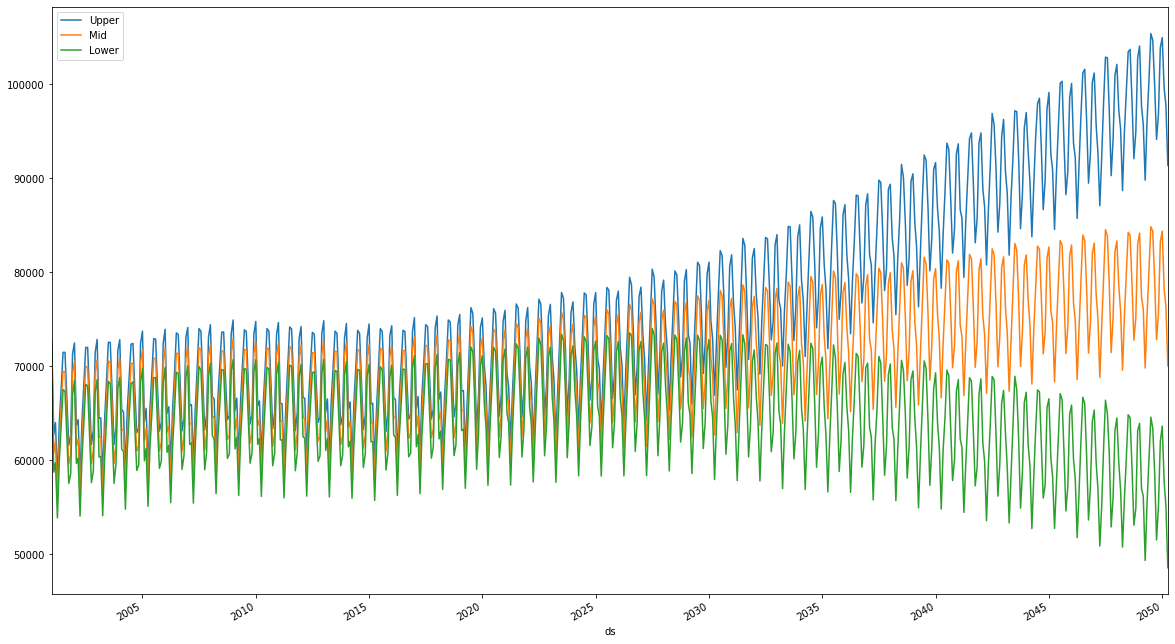

In [22]:
plt.figure(figsize = (20,12))
pred_upper['nuclear'].plot(label = 'Upper')
pred_mid['nuclear'].plot(label = 'Mid')
pred_lower['nuclear'].plot(label = 'Lower')
plt.legend()

In [23]:
nonrenewables = ['coal', 'ngas', 'other', 'nuclear', 'petroleum']
renewables = ['wind', 'solar', 'hydro', 'geo', 'bio']


pred_upper['renewables'] = pred_upper[renewables].sum(axis = 1)
pred_upper['nonrenewables'] = pred_upper[nonrenewables].sum(axis = 1)
pred_upper['total'] = pred_upper[['renewables', 'nonrenewables']].sum(axis = 1)
pred_upper['renewable percent'] = pred_upper['renewables']/pred_upper['total']
pred_upper['nonrenewable percent'] = pred_upper['nonrenewables']/pred_upper['total']

pred_upper.tail()

coal           ngas        other        nuclear  \
ds                                                                    
2049-11-30  72371.658861  175611.559831  3105.230429  103884.500695   
2049-12-31  78864.441941  188957.022018  3196.753015  104978.202272   
2050-01-31  65801.994483  177866.076123  2999.203803   99575.128695   
2050-02-28  72231.470606  161708.545829  3058.406730   97801.503353   
2050-03-31  59276.343481  161651.194987  2787.129778   91386.095624   

                   hydro           wind          geo         solar  \
ds                                                                   
2049-11-30  29686.824432  163387.395884  2281.081285  35705.575694   
2049-12-31  30658.921790  180745.122398  2196.052578  42452.757010   
2050-01-31  27611.006927  176924.831255  2068.586350  48226.301519   
2050-02-28  33929.501654  154361.790128  2284.613066  48540.383977   
2050-03-31  33407.665597  208777.739797  2027.348171  54384.626627   

                    bio    petroleum     renewables  nonrenewables  \
ds                                                                   
2049-11-30  8447.349907  3068.564905  239508.227202  358041.514721   
2049-12-31  8279.679181  4097.968759  264332.532958  380094.388004   
2050-01-31  7739.952897  3227.647473  262570.678948  349470.050577   
2050-02-28  7884.368033  3357.691144  247000.656858  338157.617661   
2050-03-31  7583.217480  2994.905455  306180.597672  318095.669325   

                    total  renewable percent  nonrenewable percent  
ds                                                                  
2049-11-30  597549.741923           0.400817              0.599183  
2049-12-31  644426.920962           0.410182              0.589818  
2050-01-31  612040.729525           0.429009              0.570991  
2050-02-28  585158.274519           0.422109              0.577891  
2050-03-31  624276.266997           0.490457              0.509543

In [24]:
pred_mid['renewables'] = pred_mid[renewables].sum(axis = 1)
pred_mid['nonrenewables'] = pred_mid[nonrenewables].sum(axis = 1)
pred_mid['total'] = pred_mid[['renewables', 'nonrenewables']].sum(axis = 1)
pred_mid['renewable percent'] = pred_mid['renewables']/pred_mid['total']
pred_mid['nonrenewable percent'] = pred_mid['nonrenewables']/pred_mid['total']

pred_mid.tail()

coal           ngas        other       nuclear         hydro  \
ds                                                                         
2049-11-30   0.0  166966.472140  1391.483581  83239.953704  26784.198717   
2049-12-31   0.0  180538.664157  1435.737925  84384.117931  27762.366444   
2050-01-31   0.0  169180.083654  1335.600356  78235.167826  24682.857252   
2050-02-28   0.0  152655.574383  1344.985412  76379.828487  30955.481452   
2050-03-31   0.0  153302.365919  1233.234004  70066.837866  30516.203210   

                     wind          geo         solar          bio  petroleum  \
ds                                                                             
2049-11-30  149370.082494  2023.397529  35031.202678  3954.178913        0.0   
2049-12-31  165009.965405  1954.350175  41745.805860  3854.157672        0.0   
2050-01-31  162052.930782  1840.849078  47503.410778  3602.645521        0.0   
2050-02-28  141231.110644  2031.470484  47909.790974  3687.983057        0.0   
2050-03-31  190999.251422  1806.580164  53643.793976  3510.244856        0.0   

               renewables  nonrenewables          total  renewable percent  \
ds                                                                           
2049-11-30  217163.060331  251597.909425  468760.969756           0.463270   
2049-12-31  240326.645556  266358.520012  506685.165568           0.474312   
2050-01-31  239682.693411  248750.851836  488433.545247           0.490717   
2050-02-28  225815.836611  230380.388281  456196.224893           0.494997   
2050-03-31  280476.073628  224602.437789  505078.511417           0.555312   

            nonrenewable percent  
ds                                
2049-11-30              0.536730  
2049-12-31              0.525688  
2050-01-31              0.509283  
2050-02-28              0.505003  
2050-03-31              0.444688

In [25]:
pred_lower['renewables'] = pred_lower[renewables].sum(axis = 1)
pred_lower['nonrenewables'] = pred_lower[nonrenewables].sum(axis = 1)
pred_lower['total'] = pred_lower[['renewables', 'nonrenewables']].sum(axis = 1)
pred_lower['renewable percent'] = pred_lower['renewables']/pred_lower['total']
pred_lower['nonrenewable percent'] = pred_lower['nonrenewables']/pred_lower['total']

pred_mid.tail()

coal           ngas        other       nuclear         hydro  \
ds                                                                         
2049-11-30   0.0  166966.472140  1391.483581  83239.953704  26784.198717   
2049-12-31   0.0  180538.664157  1435.737925  84384.117931  27762.366444   
2050-01-31   0.0  169180.083654  1335.600356  78235.167826  24682.857252   
2050-02-28   0.0  152655.574383  1344.985412  76379.828487  30955.481452   
2050-03-31   0.0  153302.365919  1233.234004  70066.837866  30516.203210   

                     wind          geo         solar          bio  petroleum  \
ds                                                                             
2049-11-30  149370.082494  2023.397529  35031.202678  3954.178913        0.0   
2049-12-31  165009.965405  1954.350175  41745.805860  3854.157672        0.0   
2050-01-31  162052.930782  1840.849078  47503.410778  3602.645521        0.0   
2050-02-28  141231.110644  2031.470484  47909.790974  3687.983057        0.0   
2050-03-31  190999.251422  1806.580164  53643.793976  3510.244856        0.0   

               renewables  nonrenewables          total  renewable percent  \
ds                                                                           
2049-11-30  217163.060331  251597.909425  468760.969756           0.463270   
2049-12-31  240326.645556  266358.520012  506685.165568           0.474312   
2050-01-31  239682.693411  248750.851836  488433.545247           0.490717   
2050-02-28  225815.836611  230380.388281  456196.224893           0.494997   
2050-03-31  280476.073628  224602.437789  505078.511417           0.555312   

            nonrenewable percent  
ds                                
2049-11-30              0.536730  
2049-12-31              0.525688  
2050-01-31              0.509283  
2050-02-28              0.505003  
2050-03-31              0.444688

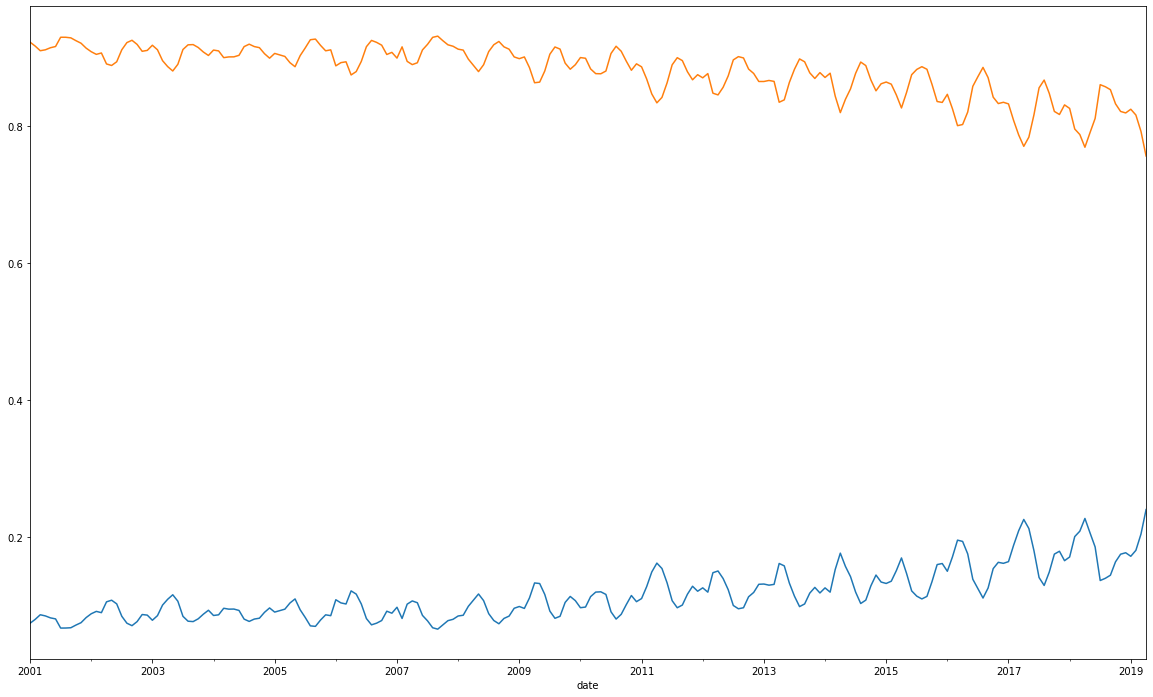

In [26]:
plt.figure(figsize = (20,12))
df_recent['Renewable Percentage'].plot()
df_recent['Nonrenewable Percentage'].plot()

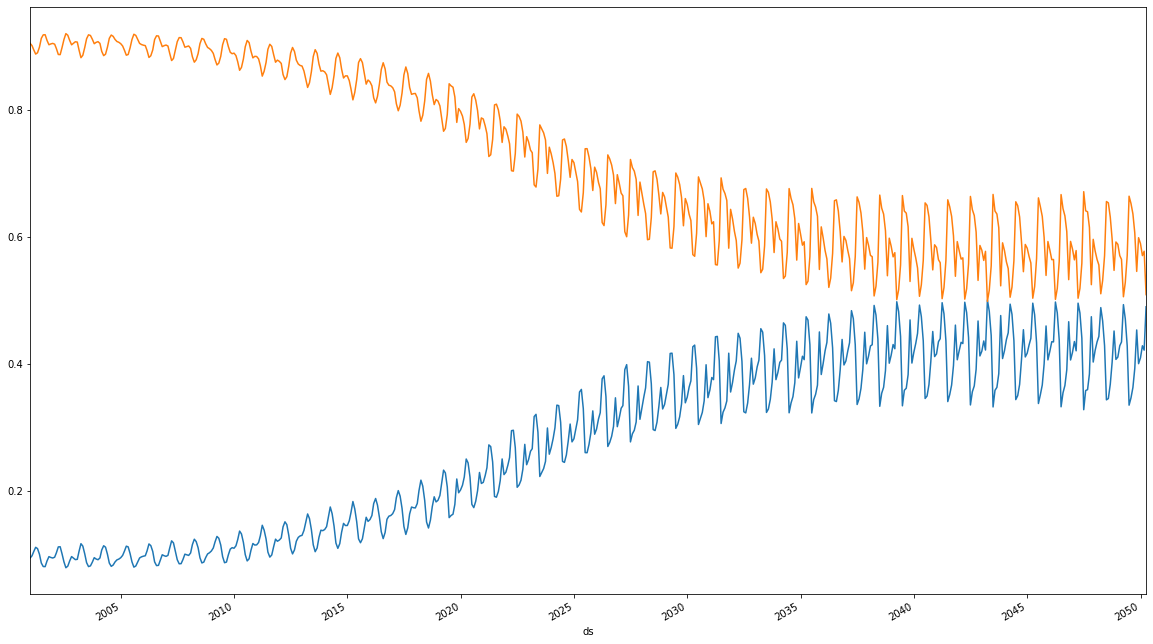

In [27]:
plt.figure(figsize = (20,12))
pred_upper['renewable percent'].plot()
pred_upper['nonrenewable percent'].plot()

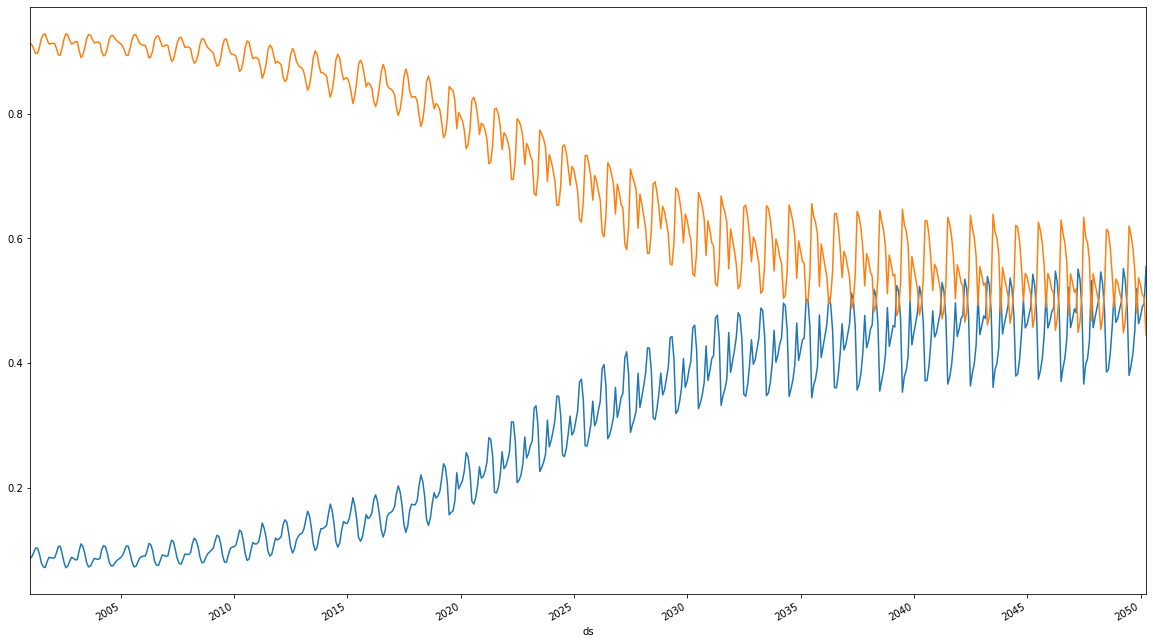

In [28]:
plt.figure(figsize = (20,12))
pred_mid['renewable percent'].plot()
pred_mid['nonrenewable percent'].plot()

# df_recent['Renewable Percentage'].plot()
# df_recent['Nonrenewable Percentage'].plot()

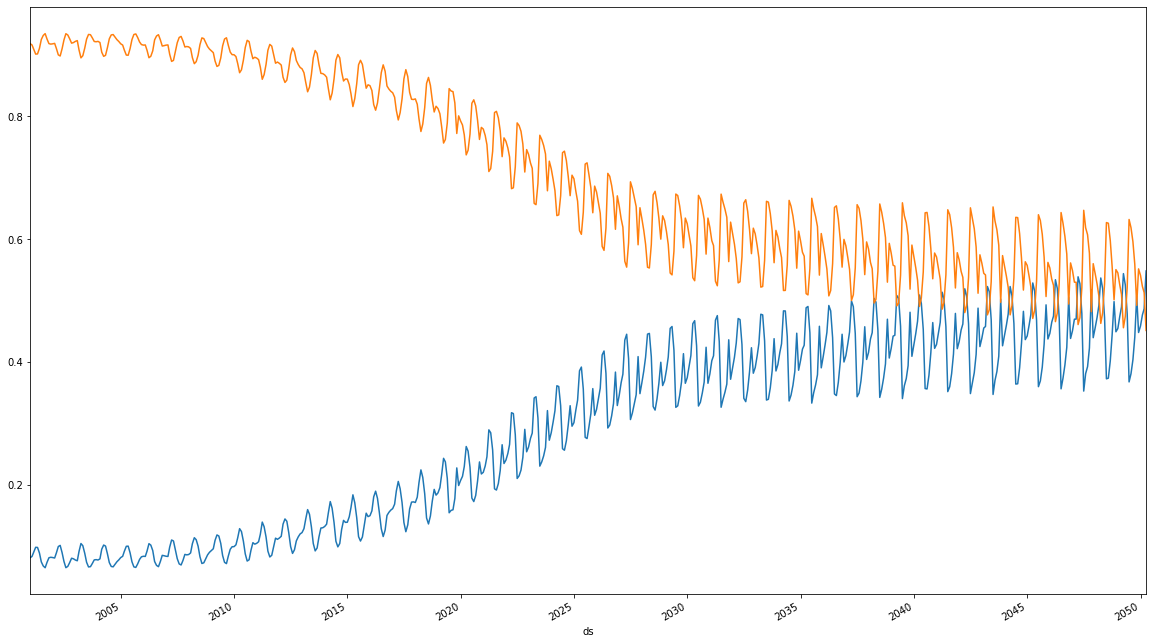

In [29]:
plt.figure(figsize = (20,12))
pred_lower['renewable percent'].plot()
pred_lower['nonrenewable percent'].plot()

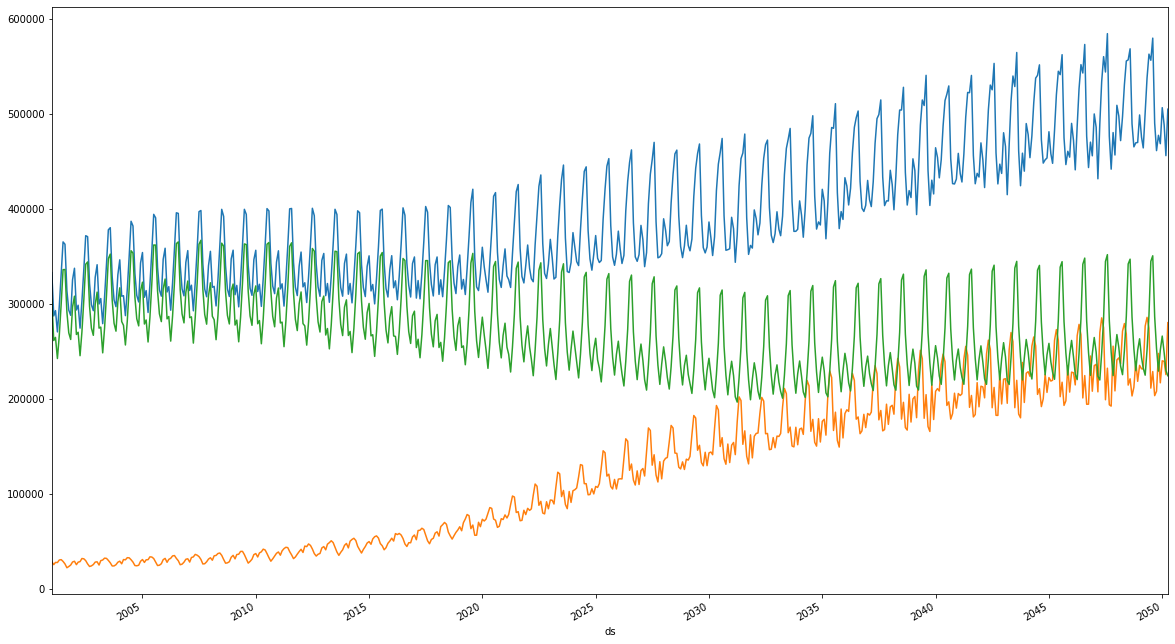

In [30]:
plt.figure(figsize = (20,12))
pred_mid['total'].plot()
pred_mid['renewables'].plot()
pred_mid['nonrenewables'].plot()

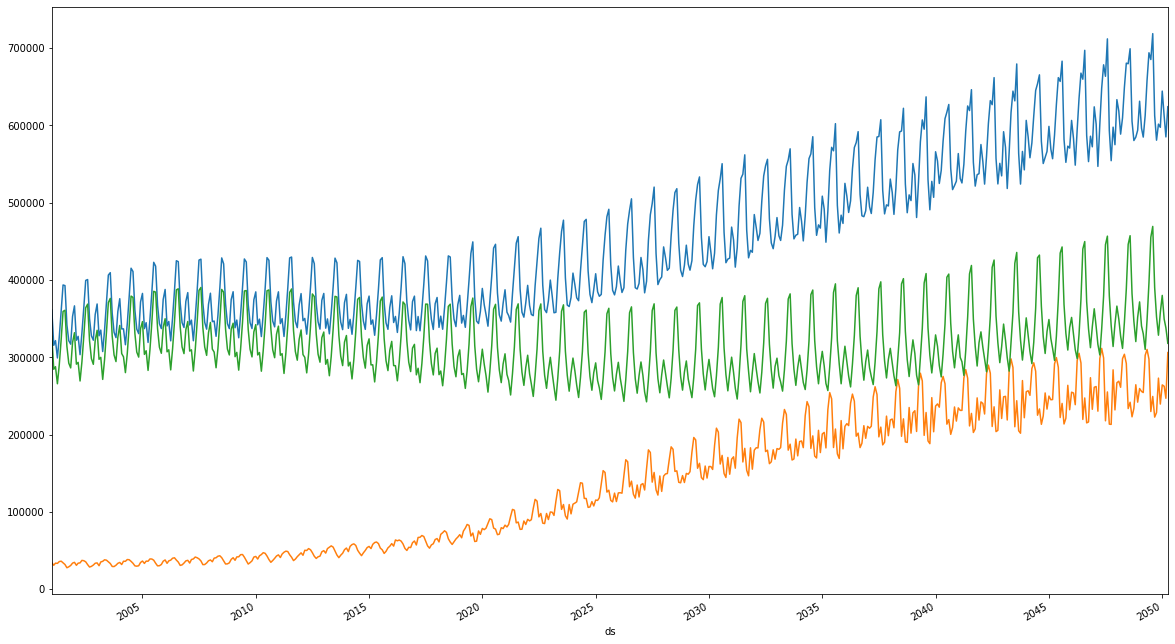

In [31]:
plt.figure(figsize = (20,12))
pred_upper['total'].plot()
pred_upper['renewables'].plot()
pred_upper['nonrenewables'].plot()

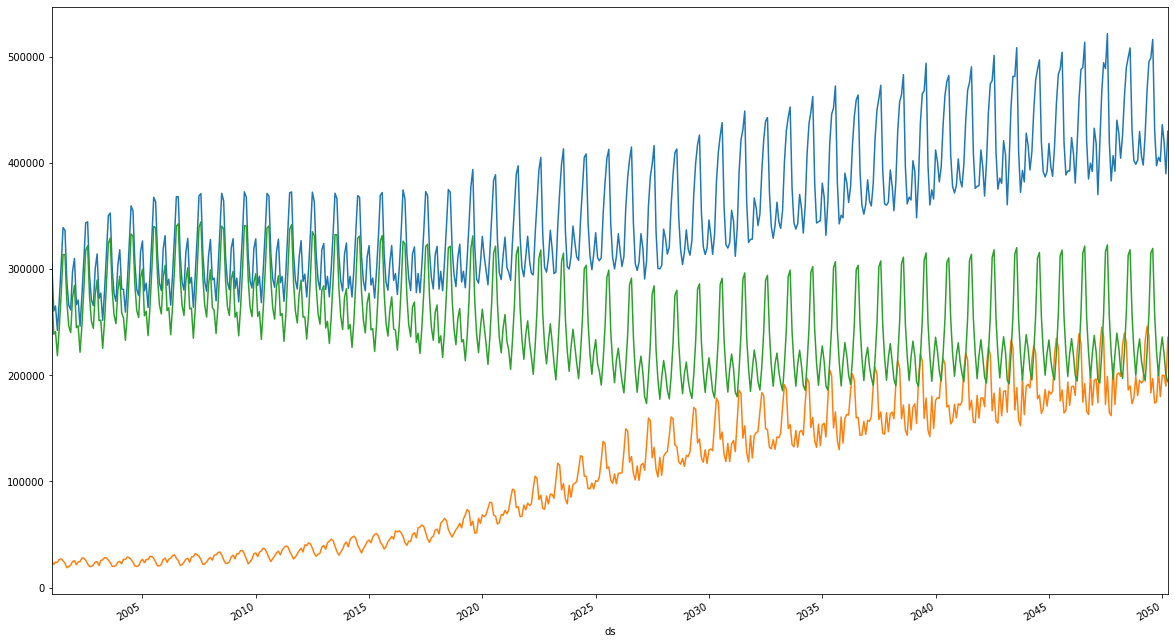

In [32]:
plt.figure(figsize = (20,12))
pred_lower['total'].plot()
pred_lower['renewables'].plot()
pred_lower['nonrenewables'].plot()

In [33]:
pred_mid[pred_mid['renewables'] > pred_mid['nonrenewables']].head()

coal           ngas        other       nuclear         hydro  \
ds                                                                         
2035-03-31   0.0  136938.533403  1074.717718  64422.107390  28589.960953   
2035-04-30   0.0  157859.718395  1314.267391  69792.760242  32234.411138   
2036-03-31   0.0  142253.223528  1151.555566  65188.993489  29895.869957   
2037-03-31   0.0  142462.291996  1137.770932  65423.910189  30307.399832   
2037-04-30   0.0  161743.357468  1308.218607  70995.905509  32427.842298   

                     wind          geo         solar          bio  petroleum  \
ds                                                                             
2035-03-31  119236.172793  1549.473258  50862.348766  4133.181545        0.0   
2035-04-30  103669.557233  1640.625400  87909.093663  4197.913482        0.0   
2036-03-31  119419.212487  1595.829141  58325.374712  4100.653159        0.0   
2037-03-31  127701.822727  1602.595354  55907.991329  4055.754241        0.0   
2037-04-30  112834.999624  1684.845358  84097.082463  4140.752049        0.0   

               renewables  nonrenewables          total  renewable percent  \
ds                                                                           
2035-03-31  204371.137316  202435.358511  406806.495827           0.502379   
2035-04-30  229651.600915  228966.746027  458618.346942           0.500747   
2036-03-31  213336.939455  208593.772583  421930.712039           0.505621   
2037-03-31  219575.563483  209023.973118  428599.536600           0.512309   
2037-04-30  235185.521791  234047.481585  469233.003376           0.501213   

            nonrenewable percent  
ds                                
2035-03-31              0.497621  
2035-04-30              0.499253  
2036-03-31              0.494379  
2037-03-31              0.487691  
2037-04-30              0.498787

In [34]:
pred_upper[pred_upper['renewables'] > pred_upper['nonrenewables']].head()

coal           ngas        other       nuclear  \
ds                                                                   
2043-03-31  41138.099661  154754.896493  2125.448782  81837.840801   

                   hydro           wind          geo         solar  \
ds                                                                   
2043-03-31  31288.514136  191883.243575  1827.097976  51881.111043   

                    bio    petroleum     renewables  nonrenewables  \
ds                                                                   
2043-03-31  6535.107313  2277.085067  283415.074042  282133.370804   

                    total  renewable percent  nonrenewable percent  
ds                                                                  
2043-03-31  565548.444846           0.501133              0.498867

In [35]:
pred_lower[pred_lower['renewables'] > pred_lower['nonrenewables']].head()

coal           ngas       other       nuclear         hydro  \
ds                                                                        
2038-03-31   0.0  133869.349485  411.208555  55723.361303  26904.111704   
2039-03-31   0.0  134089.304857  329.930167  54953.643601  26488.222252   
2039-04-30   0.0  155913.796457  427.946491  60523.465436  28658.102150   
2040-03-31   0.0  139368.339862  339.041878  54829.823562  26003.920032   
2041-03-31   0.0  139227.448693  248.776272  54472.697563  26546.855329   

                     wind          geo         solar          bio  petroleum  \
ds                                                                             
2038-03-31  109445.904496  1499.151284  52850.456962  2172.987361        0.0   
2039-03-31  115556.011501  1493.410533  50459.686734  1936.936880        0.0   
2039-04-30  100373.201868  1590.424168  87766.906554  1958.542430        0.0   
2040-03-31  114656.486152  1537.755883  57895.581980  1773.033592        0.0   
2041-03-31  119978.642493  1525.555485  55413.889739  1519.563184        0.0   

               renewables  nonrenewables          total  renewable percent  \
ds                                                                           
2038-03-31  192872.611808  190003.919343  382876.531151           0.503746   
2039-03-31  195934.267901  189372.878625  385307.146526           0.508514   
2039-04-30  220347.177171  216865.208384  437212.385555           0.503982   
2040-03-31  201866.777639  194537.205302  396403.982941           0.509245   
2041-03-31  204984.506231  193948.922528  398933.428760           0.513831   

            nonrenewable percent  
ds                                
2038-03-31              0.496254  
2039-03-31              0.491486  
2039-04-30              0.496018  
2040-03-31              0.490755  
2041-03-31              0.486169

## PRELIMINARY ESTIMATE:

It bumps around a lot, but the first time that invisible threshold is reached will likely be between 2038 and 2043

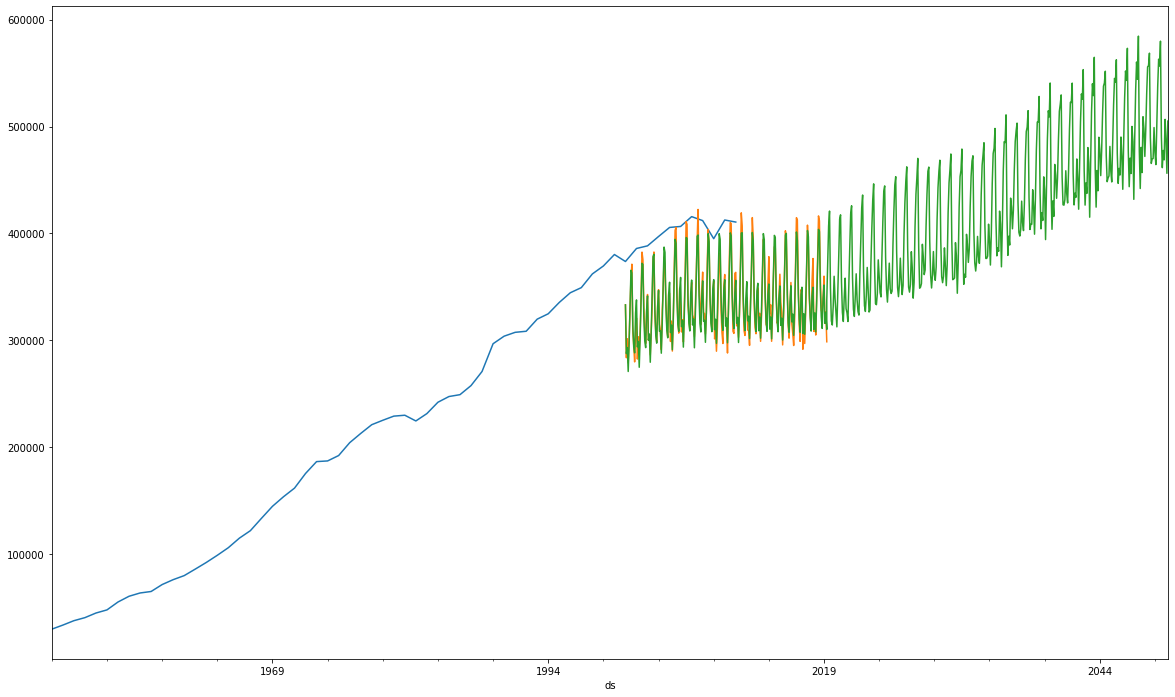

In [36]:
plt.figure(figsize = (20,12))
df_past['Total'].plot()
df_recent['Total'].plot()
pred_mid['total'].plot()

In [37]:
df_recent['Total'].tail()

date
2018-12-01    339631.0
2019-01-01    359953.0
2019-02-01    315754.0
2019-03-01    326566.0
2019-04-01    298531.0
Name: Total, dtype: float64

Text(0.5, 1.0, 'Midrange Prediction versus Actual')

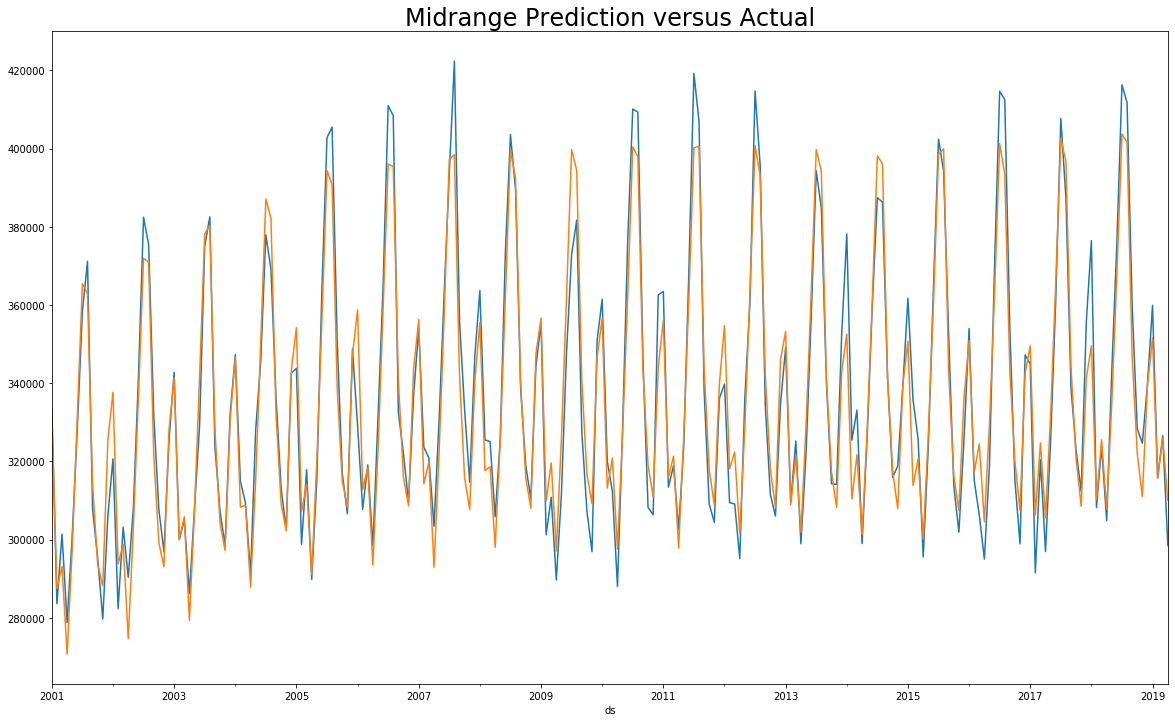

In [38]:
plt.figure(figsize = (20,12))
df_recent['Total'].plot()
pred_mid['total'][:'2019-04-01'].plot()
plt.title("Midrange Prediction versus Actual", size = 24)

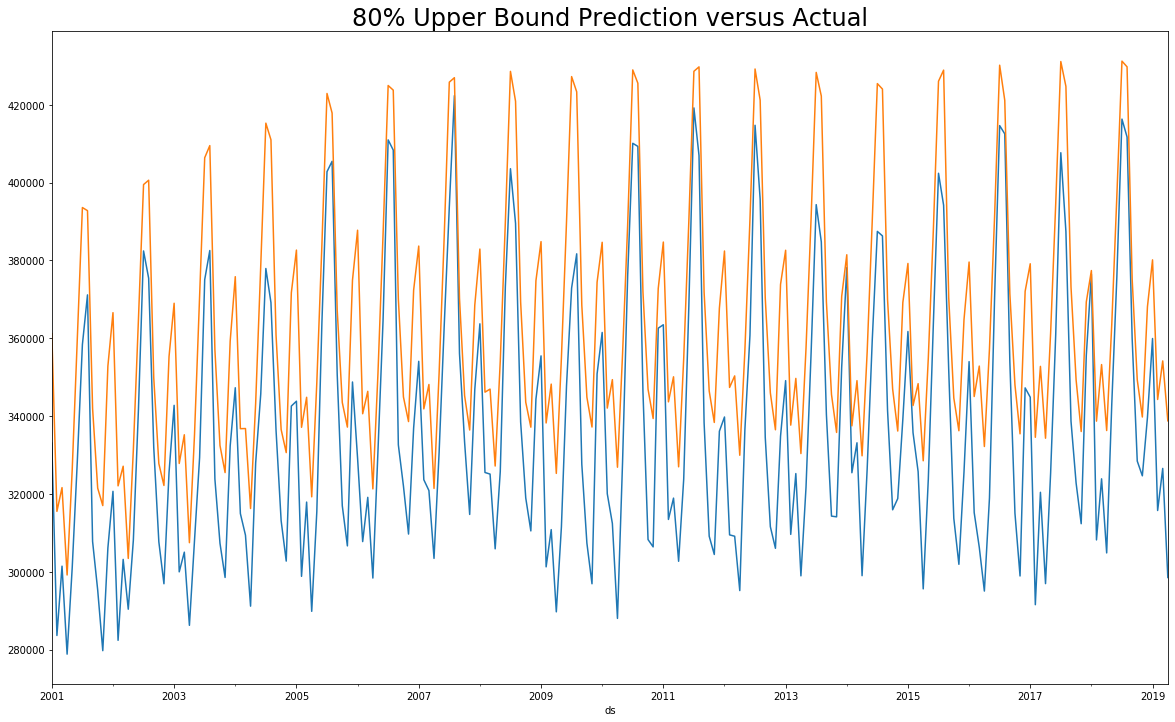

In [39]:
plt.figure(figsize = (20,12))
df_recent['Total'].plot()
pred_upper['total'][:'2019-04-01'].plot()
plt.title("80% Upper Bound Prediction versus Actual", size = 24);

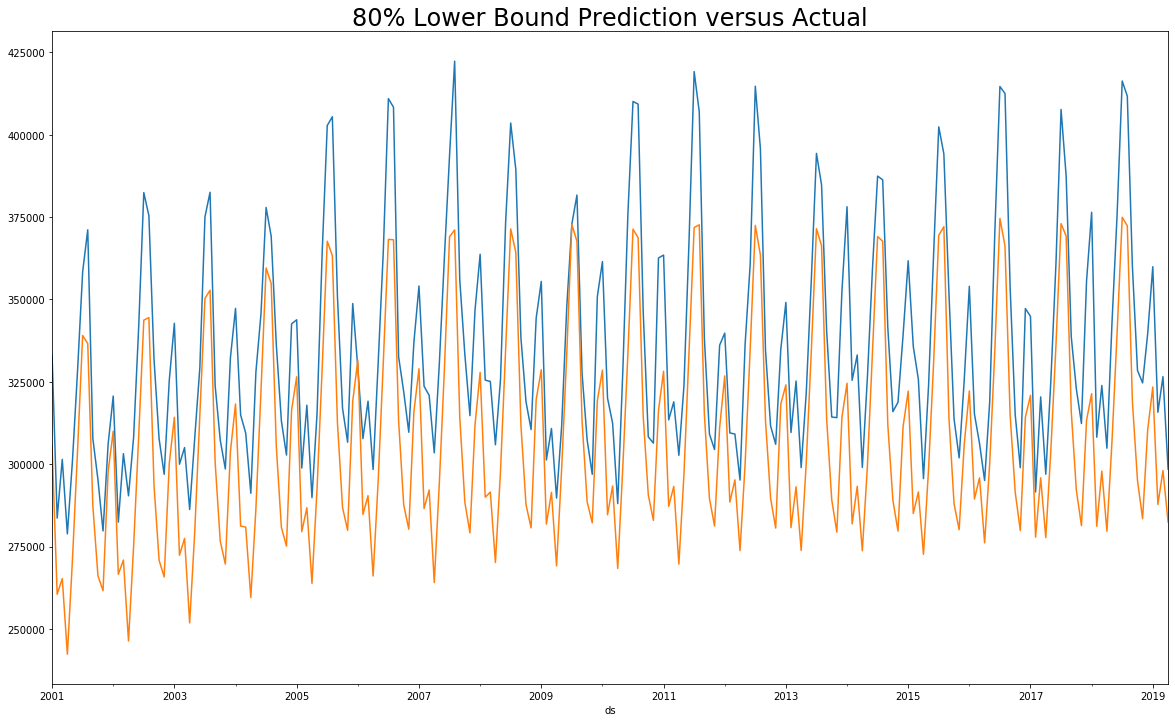

In [40]:
plt.figure(figsize = (20,12))
df_recent['Total'].plot()
pred_lower['total'][:'2019-04-01'].plot()
plt.title("80% Lower Bound Prediction versus Actual", size = 24);

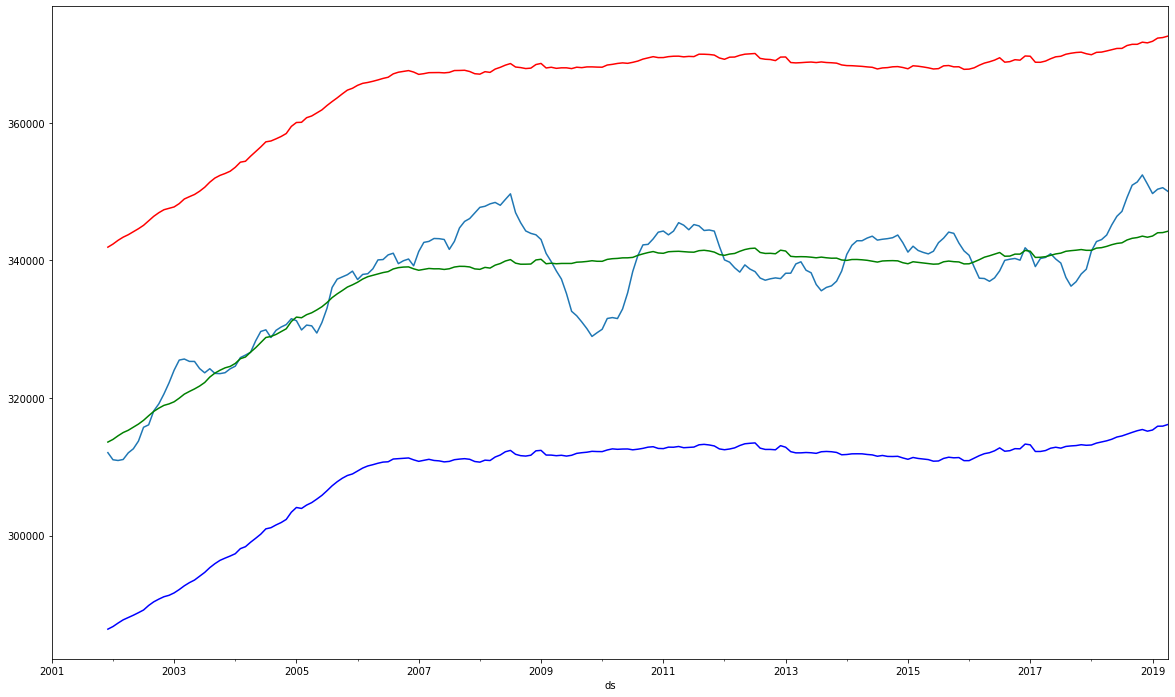

In [41]:
plt.figure(figsize = (20,12))
df_recent['Total'].rolling(12).mean().plot()
pred_lower['total'][:'2019-04-01'].rolling(12).mean().plot(color = 'blue')
pred_mid['total'][:'2019-04-01'].rolling(12).mean().plot(color = 'green')
pred_upper['total'][:'2019-04-01'].rolling(12).mean().plot(color = 'red')


In [42]:
from sklearn import metrics

In [43]:
metrics.r2_score(df_recent['Total'],pred_mid['total'][:'2019-04-01'])

0.9289714669587185

In [44]:
metrics.r2_score(df_recent['Total'],pred_upper['total'][:'2019-04-01'])

0.27215890826738165

In [45]:
metrics.r2_score(df_recent['Total'],pred_lower['total'][:'2019-04-01'])

0.21697969210216483

## Overall accuracy:

I did not specifically model the total, however by combining all of my other predictions and comparing it to the total, my r2 score was 92.9 percent! 

https://www.forbes.com/sites/judeclemente/2018/08/26/why-u-s-electricity-demand-will-increase/#e7e9fc06dfb3
- Why demand will increase

https://www.powerengineeringint.com/articles/2017/11/iea-spotlights-deep-rippling-effect-of-electrification.html

- "Deep Electrification"

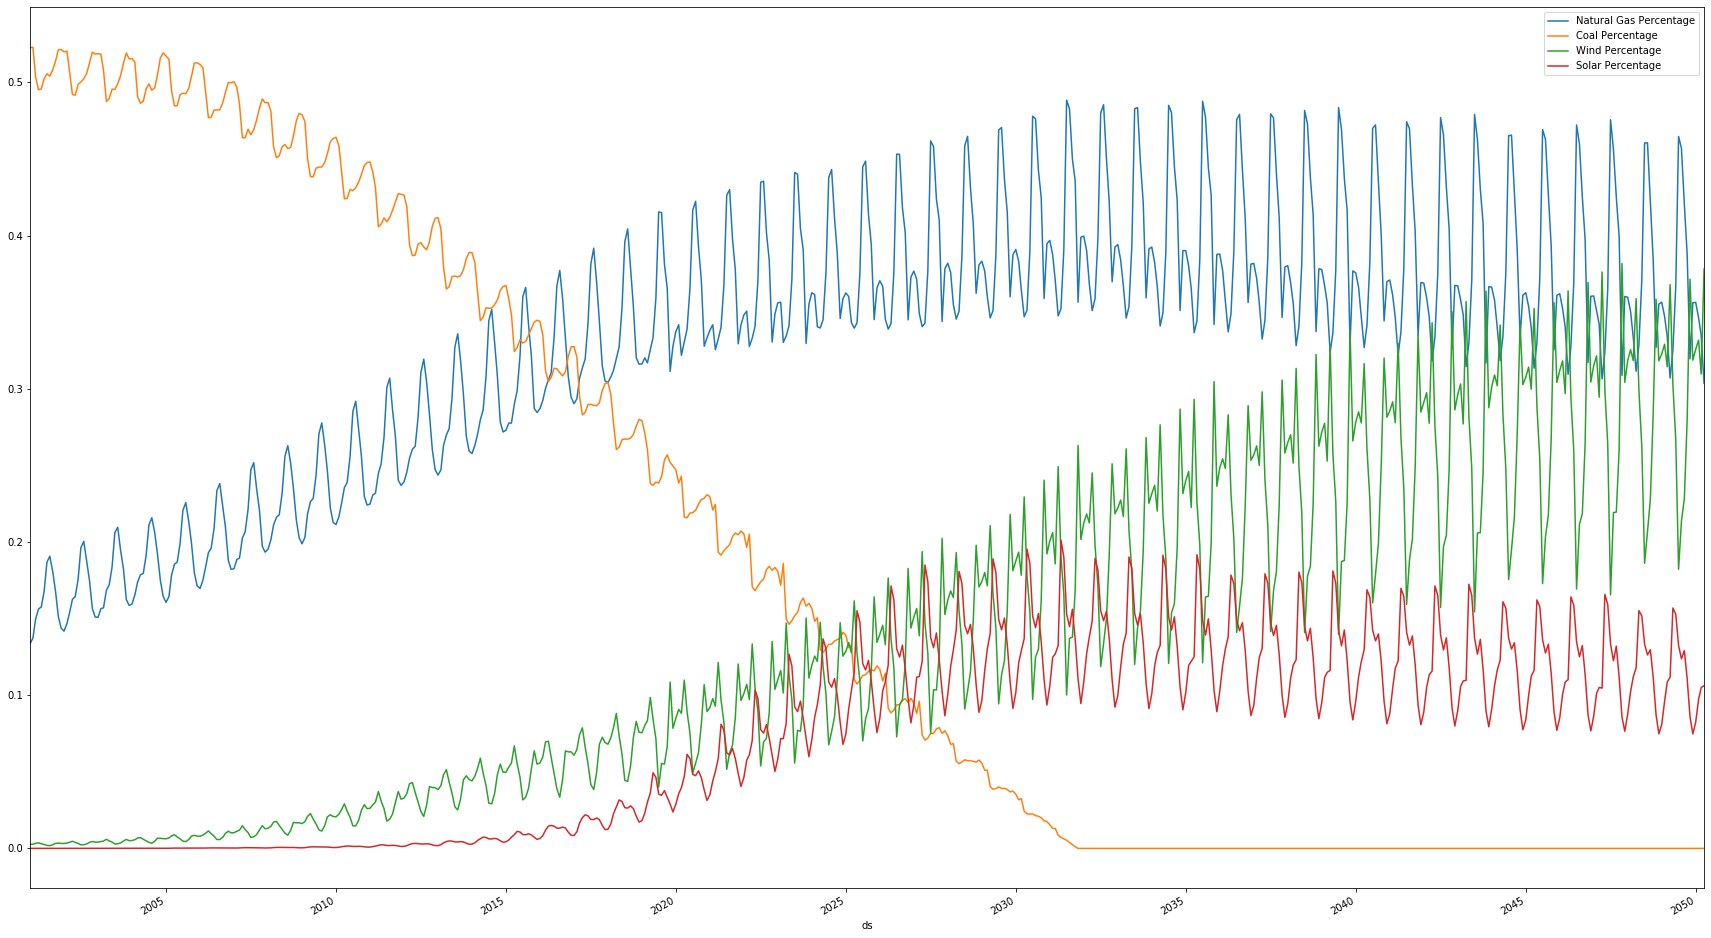

In [46]:
plt.figure(figsize = (30,18))
(pred_mid['ngas'] / pred_mid['total']).plot(label = 'Natural Gas Percentage')
(pred_mid['coal'] / pred_mid['total']).plot(label = 'Coal Percentage')
(pred_mid['wind'] / pred_mid['total']).plot(label = 'Wind Percentage')
(pred_mid['solar'] / pred_mid['total']).plot(label = 'Solar Percentage')
plt.legend()

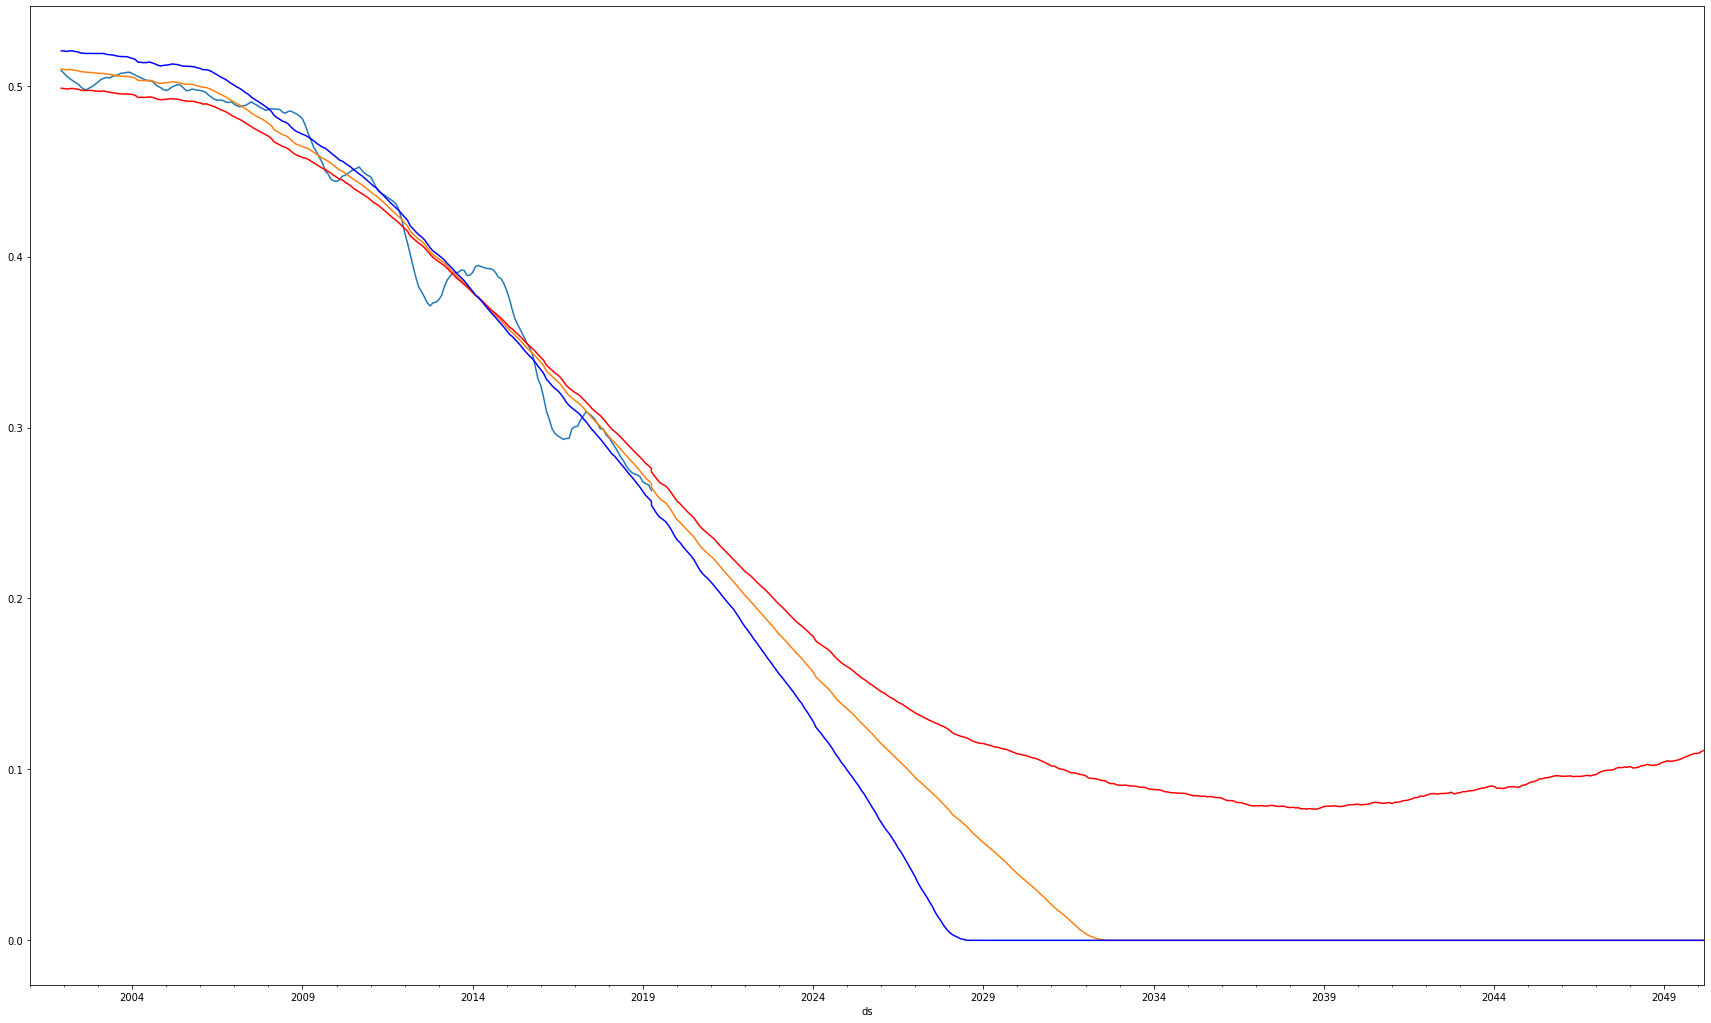

In [47]:
plt.figure(figsize = (30,18))
(df_recent['Coal']/df_recent['Total']).rolling(12).mean().plot()
(pred_mid['coal'] / pred_mid['total']).rolling(12).mean().plot()
(pred_upper['coal'] / pred_upper['total']).rolling(12).mean().plot(color = 'red')
(pred_lower['coal'] / pred_lower['total']).rolling(12).mean().plot(color = 'blue')

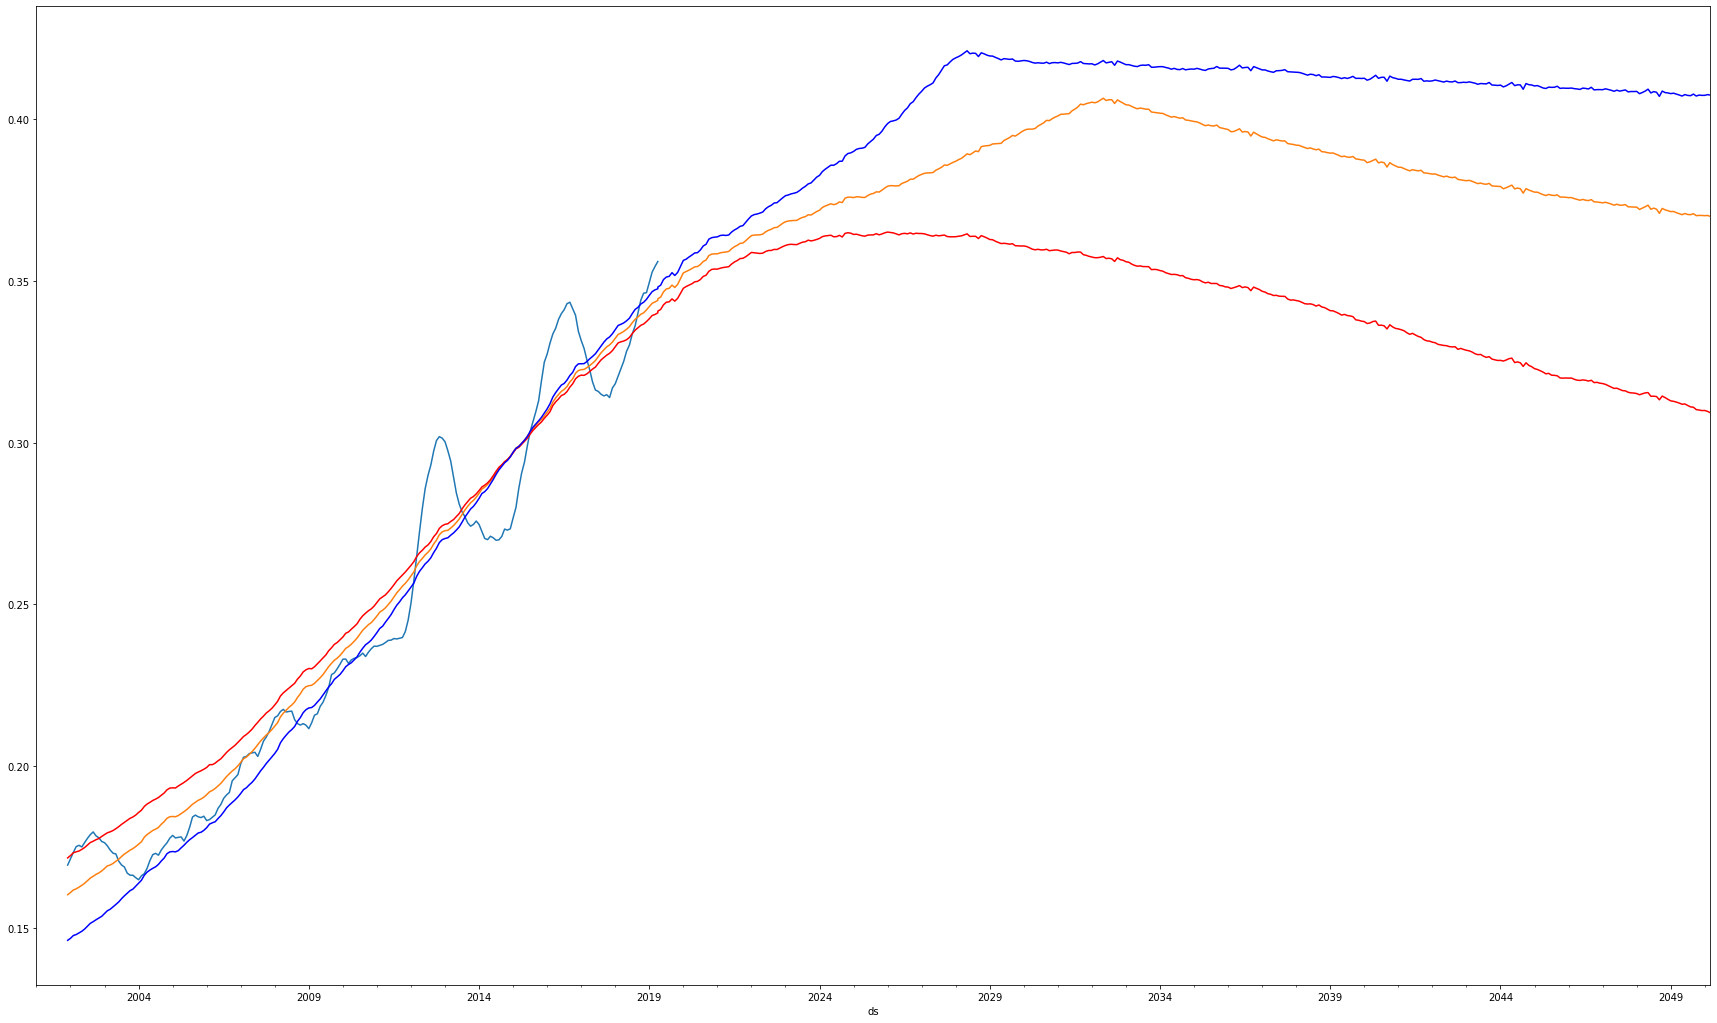

In [48]:
plt.figure(figsize = (30,18))
(df_recent['Natural Gas']/df_recent['Total']).rolling(12).mean().plot()
(pred_mid['ngas'] / pred_mid['total']).rolling(12).mean().plot()
(pred_upper['ngas'] / pred_upper['total']).rolling(12).mean().plot(color = 'red')
(pred_lower['ngas'] / pred_lower['total']).rolling(12).mean().plot(color = 'blue')

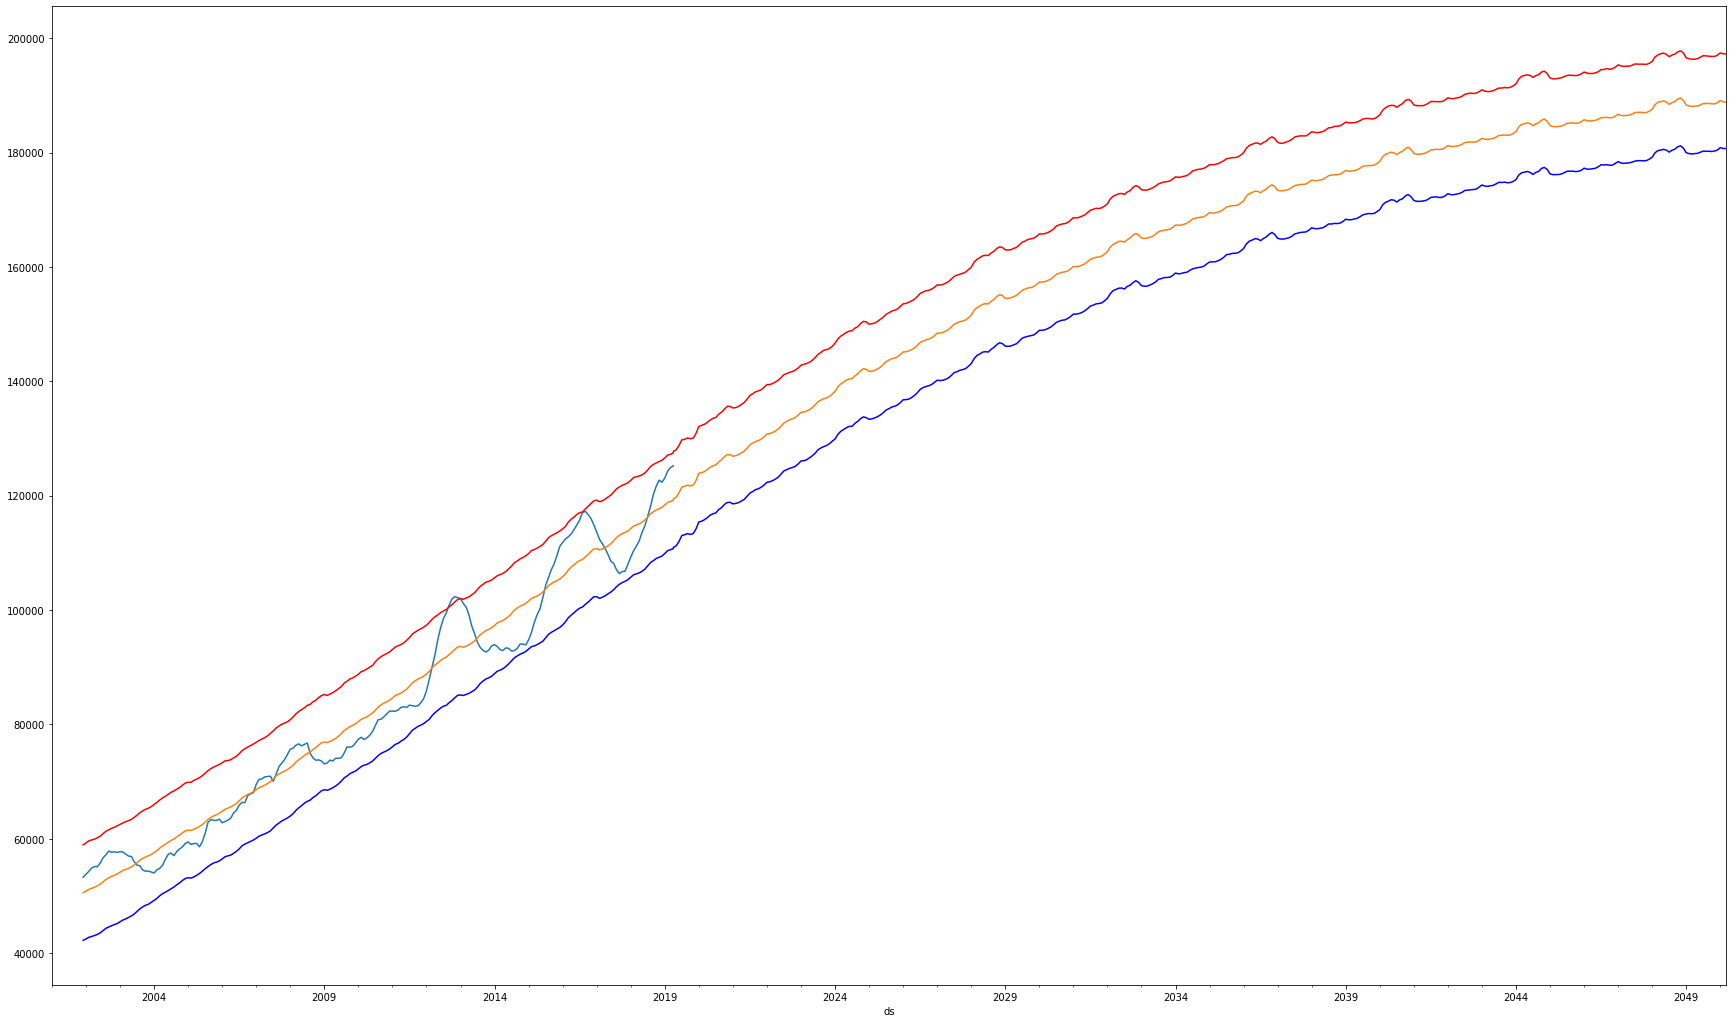

In [49]:
plt.figure(figsize = (30,18))
(df_recent['Natural Gas']).rolling(12).mean().plot()
(pred_mid['ngas']).rolling(12).mean().plot()
(pred_upper['ngas']).rolling(12).mean().plot(color = 'red')
(pred_lower['ngas']).rolling(12).mean().plot(color = 'blue')

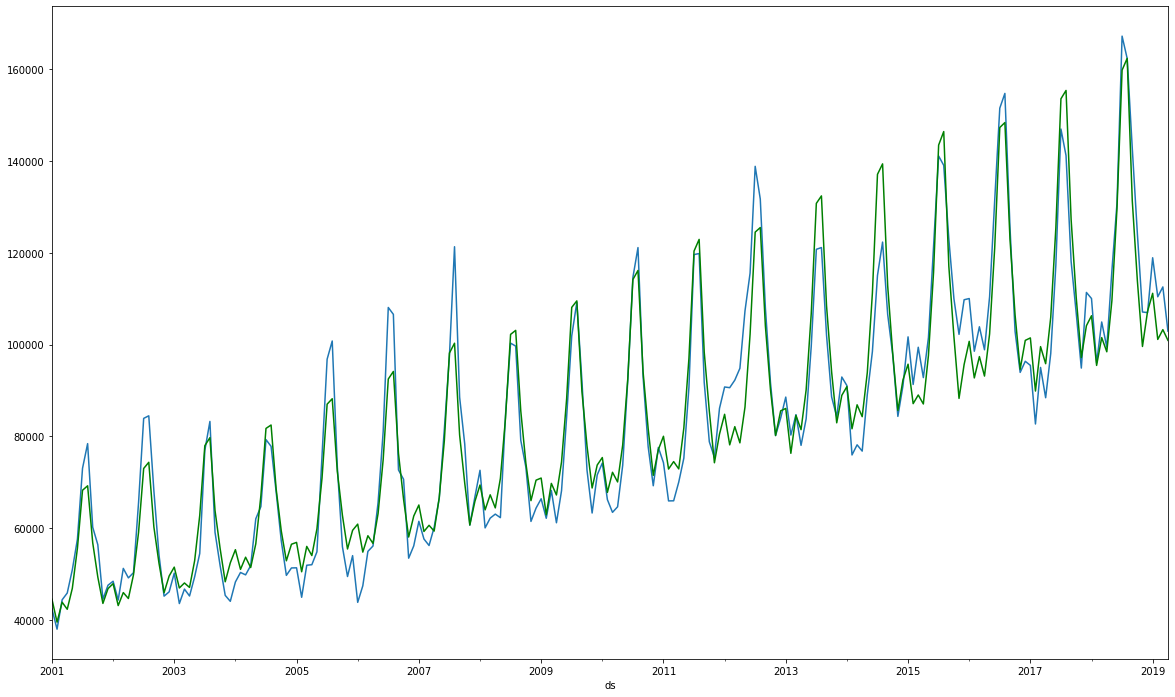

In [50]:
plt.figure(figsize = (20,12))
df_recent['Natural Gas'].plot()
#pred_lower['ngas'][:'2019-04-01'].rolling(12).mean().plot(color = 'blue')
pred_mid['ngas'][:'2019-04-01'].plot(color = 'green')
#pred_upper['ngas'][:'2019-04-01'].rolling(12).mean().plot(color = 'red')

In [51]:
metrics.r2_score(df_recent['Natural Gas'],pred_mid['ngas'][:'2019-04-01'])

0.9408196128201329

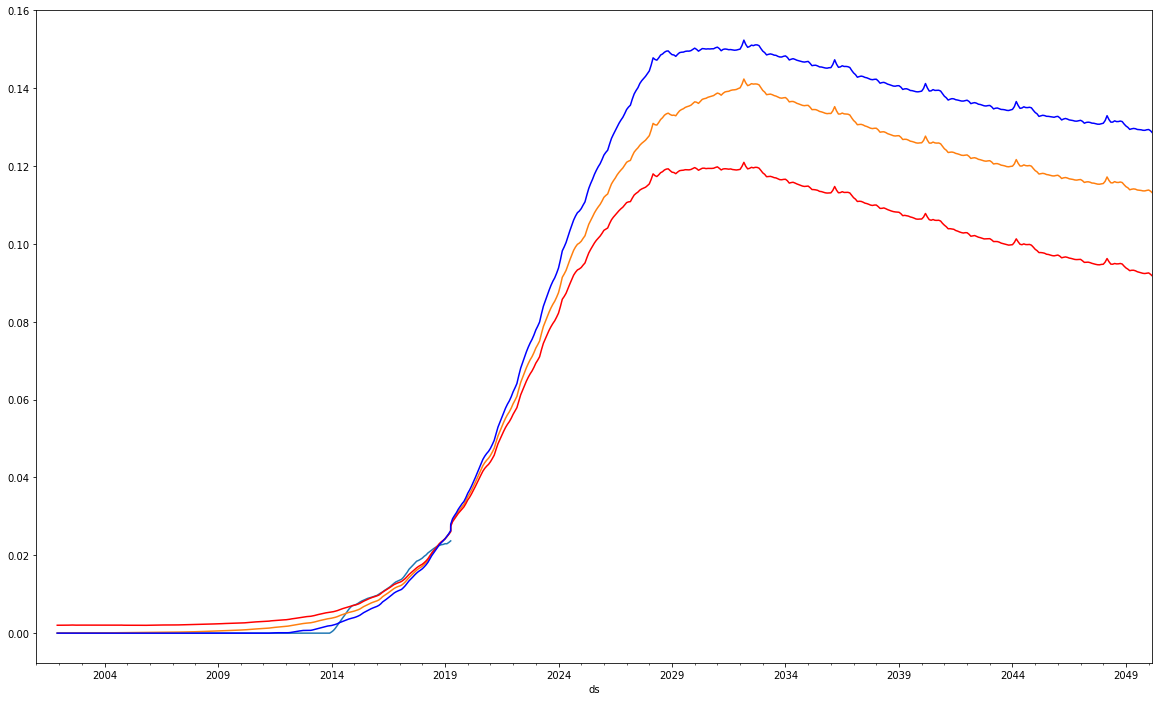

In [52]:
plt.figure(figsize = (20,12))
(df_recent['Solar/PV']/df_recent['Total']).rolling(12).mean().plot()
(pred_mid['solar'] / pred_mid['total']).rolling(12).mean().plot()
(pred_upper['solar'] / pred_upper['total']).rolling(12).mean().plot(color = 'red')
(pred_lower['solar'] / pred_lower['total']).rolling(12).mean().plot(color = 'blue')

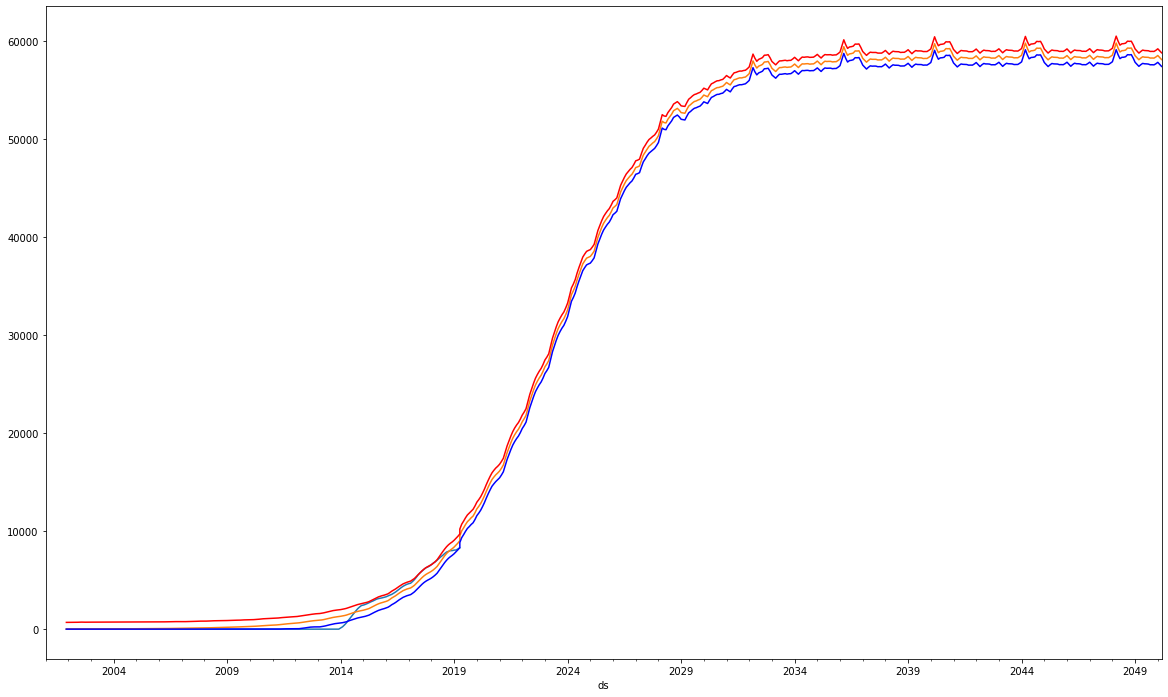

In [53]:
plt.figure(figsize = (20,12))
(df_recent['Solar/PV']).rolling(12).mean().plot()
(pred_mid['solar']).rolling(12).mean().plot()
(pred_upper['solar']).rolling(12).mean().plot(color = 'red')
(pred_lower['solar']).rolling(12).mean().plot(color = 'blue')

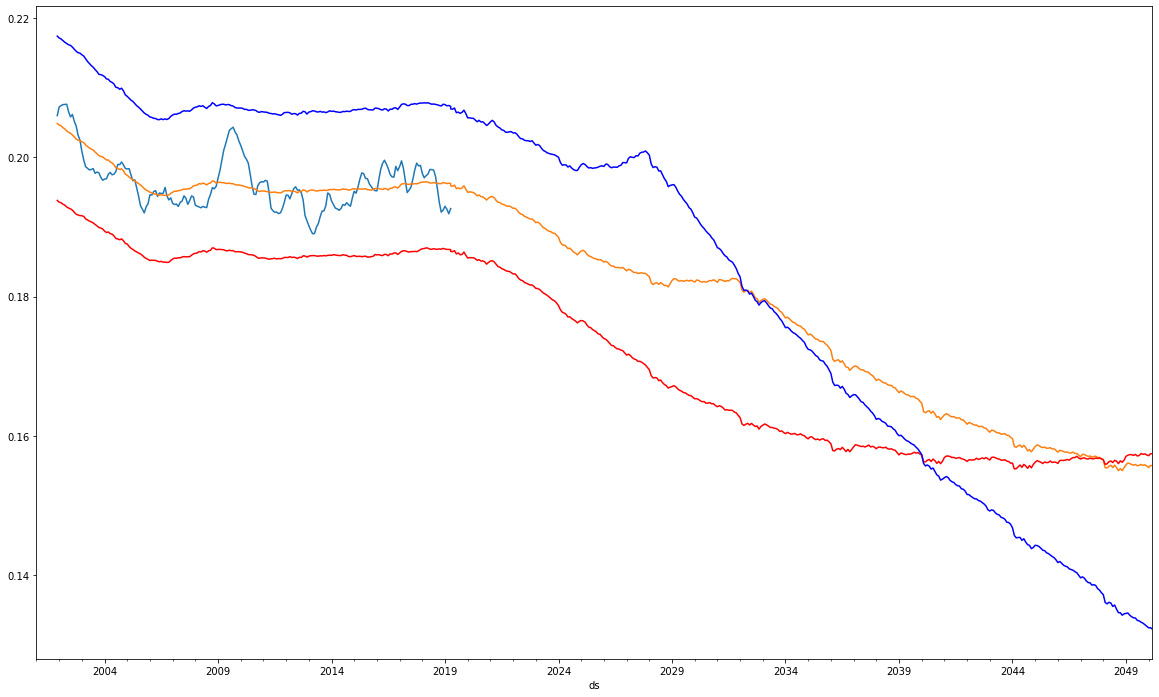

In [54]:
plt.figure(figsize = (20,12))
(df_recent['Nuclear']/df_recent['Total']).rolling(12).mean().plot()
(pred_mid['nuclear'] / pred_mid['total']).rolling(12).mean().plot()
(pred_upper['nuclear'] / pred_upper['total']).rolling(12).mean().plot(color = 'red')
(pred_lower['nuclear'] / pred_lower['total']).rolling(12).mean().plot(color = 'blue')

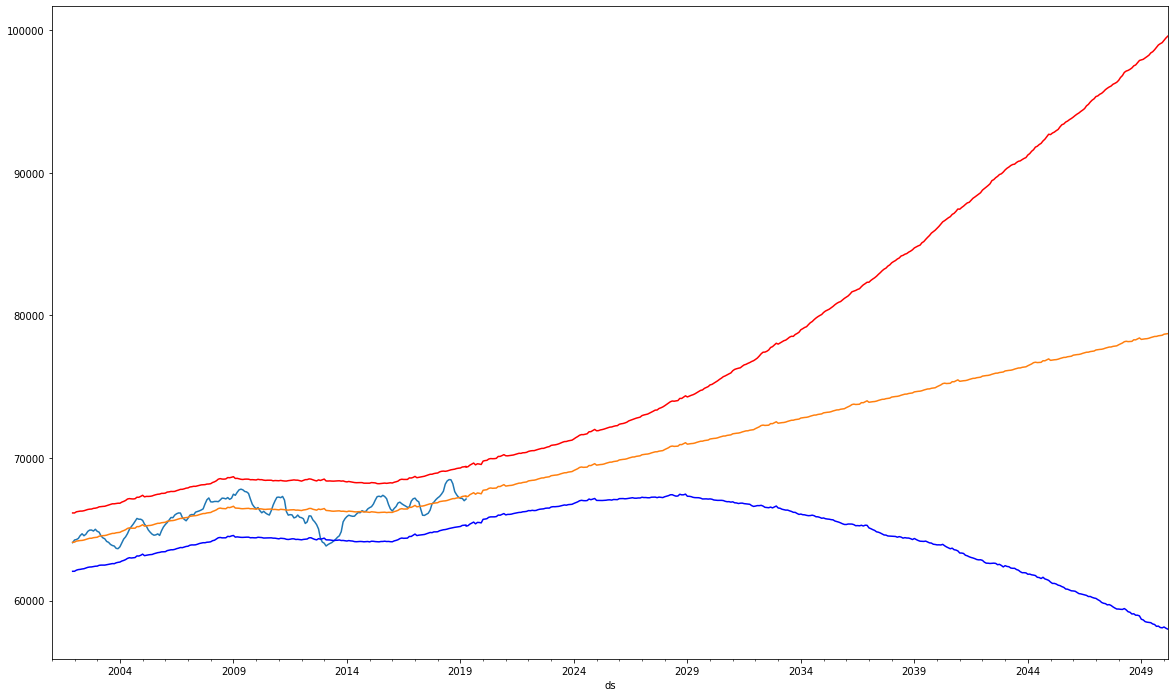

In [55]:
plt.figure(figsize = (20,12))
(df_recent['Nuclear']).rolling(12).mean().plot()
(pred_mid['nuclear']).rolling(12).mean().plot()
(pred_upper['nuclear']).rolling(12).mean().plot(color = 'red')
(pred_lower['nuclear']).rolling(12).mean().plot(color = 'blue')

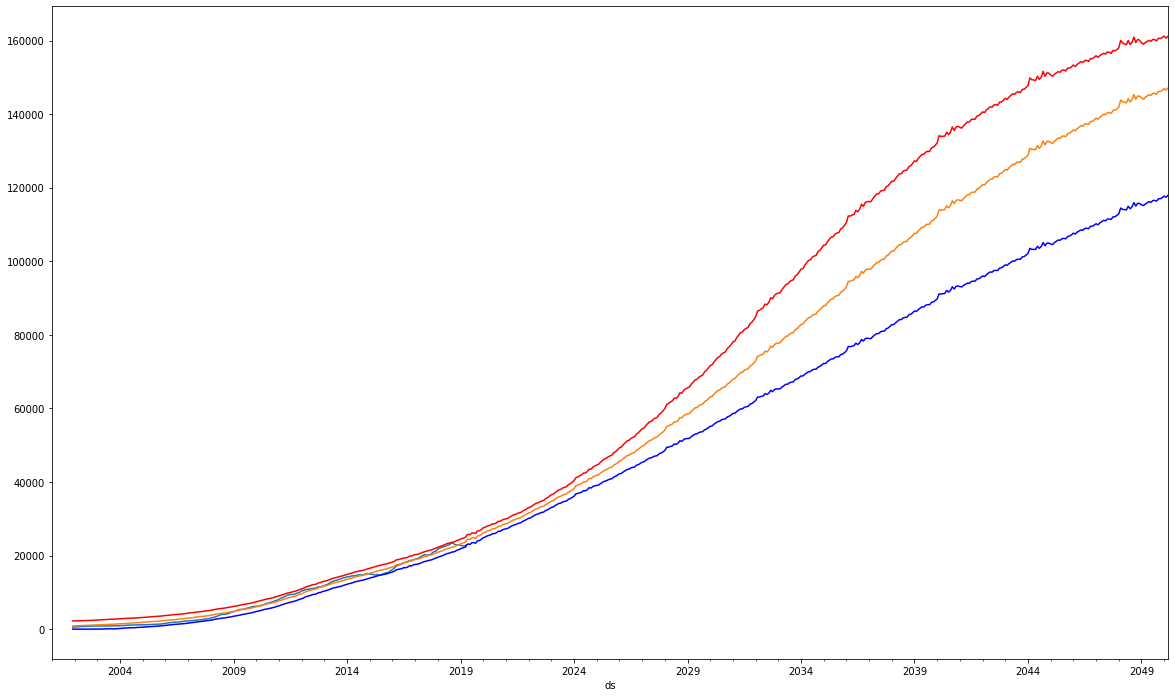

In [56]:
plt.figure(figsize = (20,12))
(df_recent['Wind']).rolling(12).mean().plot()
(pred_mid['wind']).rolling(12).mean().plot()
(pred_upper['wind']).rolling(12).mean().plot(color = 'red')
(pred_lower['wind']).rolling(12).mean().plot(color = 'blue')

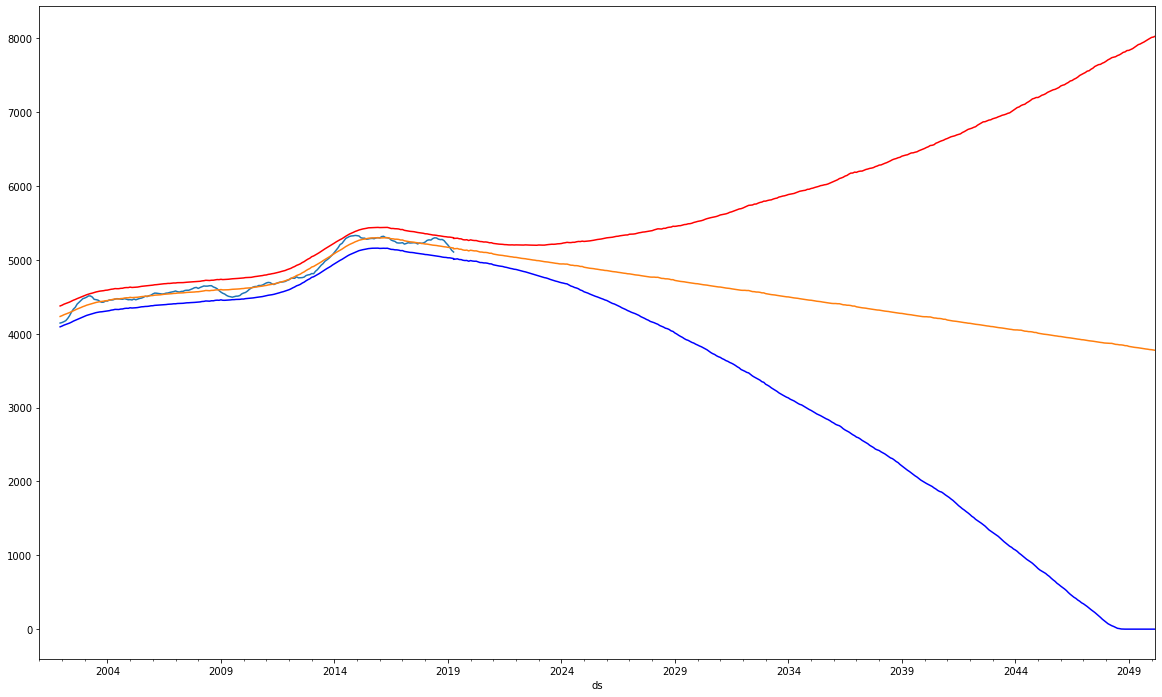

In [57]:
plt.figure(figsize = (20,12))
(df_recent['Biomass Total']).rolling(12).mean().plot()
(pred_mid['bio']).rolling(12).mean().plot()
(pred_upper['bio']).rolling(12).mean().plot(color = 'red')
(pred_lower['bio']).rolling(12).mean().plot(color = 'blue')

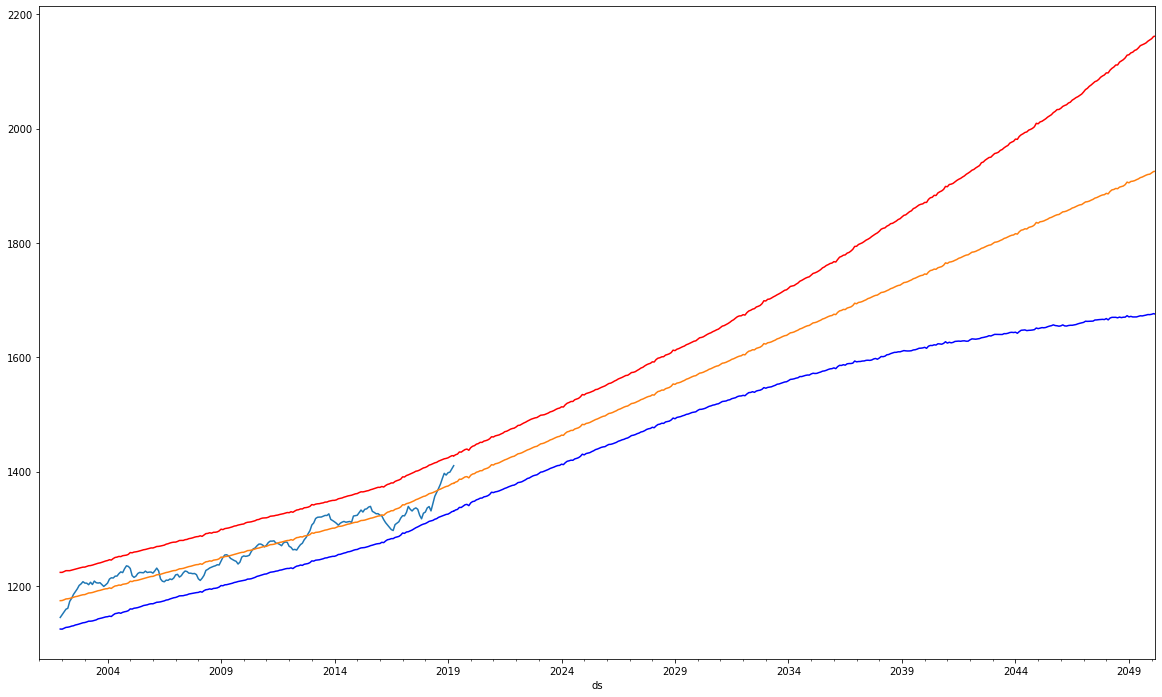

In [58]:
plt.figure(figsize = (20,12))
(df_recent['Geo- thermal']).rolling(12).mean().plot()
(pred_mid['geo']).rolling(12).mean().plot()
(pred_upper['geo']).rolling(12).mean().plot(color = 'red')
(pred_lower['geo']).rolling(12).mean().plot(color = 'blue')

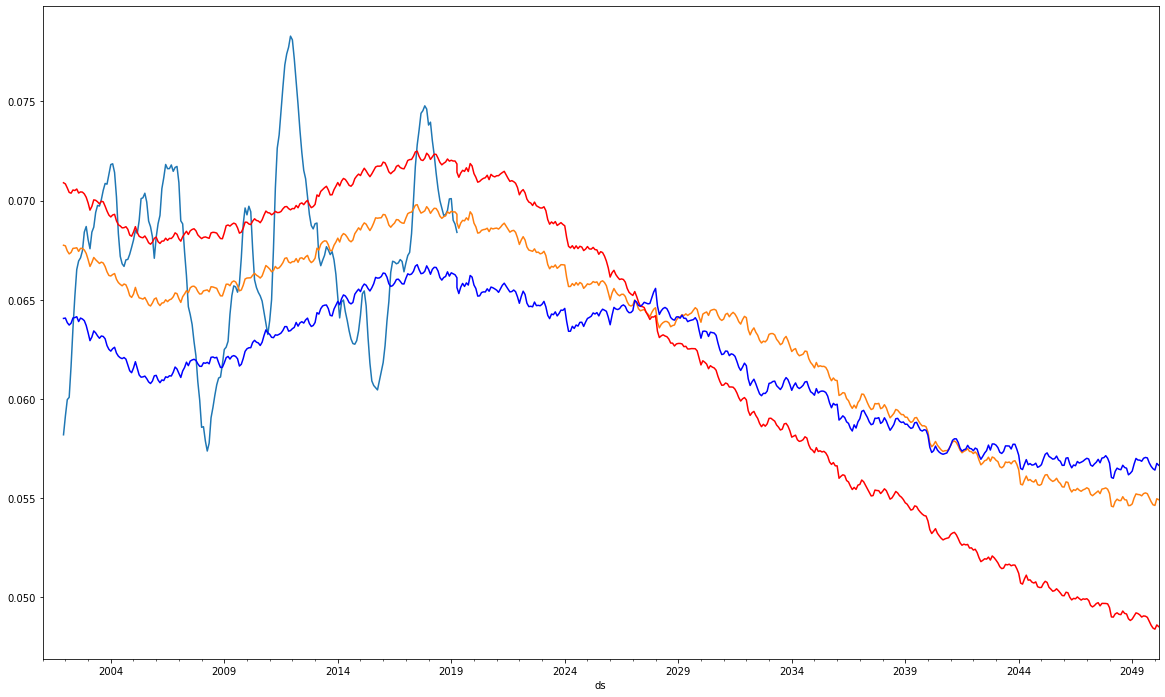

In [59]:
plt.figure(figsize = (20,12))
(df_recent['Conventional Hydroelectric Power']/df_recent['Total']).rolling(12).mean().plot()
(pred_mid['hydro'] / pred_mid['total']).rolling(12).mean().plot()
(pred_upper['hydro'] / pred_upper['total']).rolling(12).mean().plot(color = 'red')
(pred_lower['hydro'] / pred_lower['total']).rolling(12).mean().plot(color = 'blue')

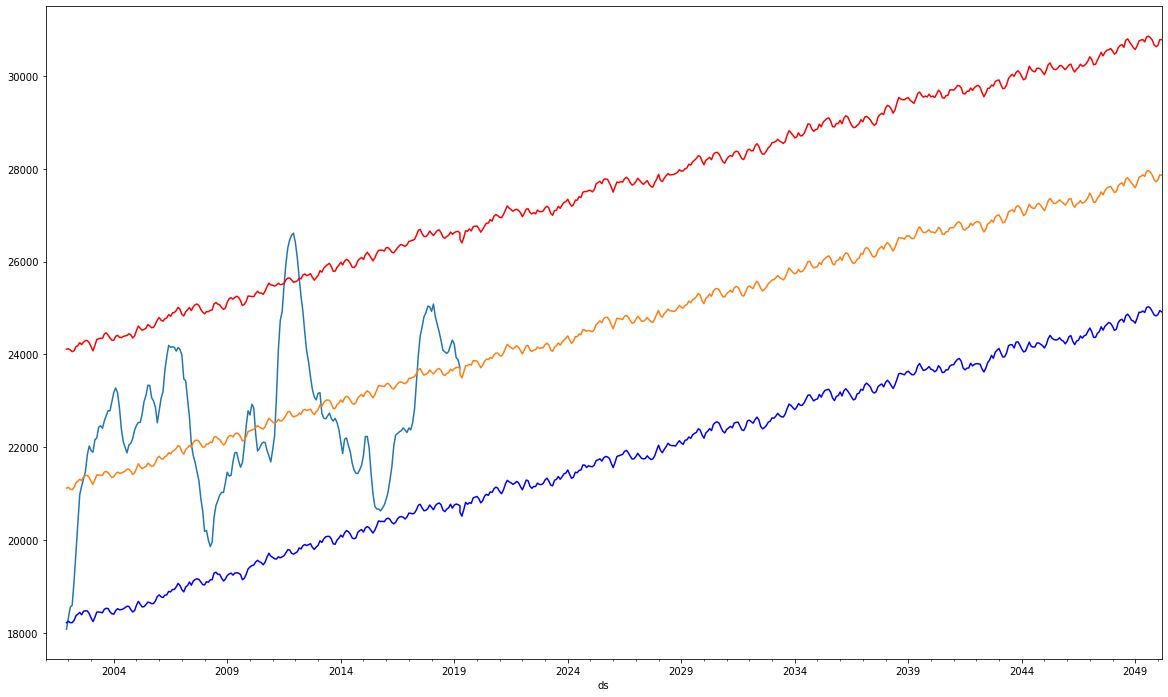

In [60]:
plt.figure(figsize = (20,12))
(df_recent['Conventional Hydroelectric Power']).rolling(12).mean().plot()
(pred_mid['hydro']).rolling(12).mean().plot()
(pred_upper['hydro']).rolling(12).mean().plot(color = 'red')
(pred_lower['hydro']).rolling(12).mean().plot(color = 'blue')

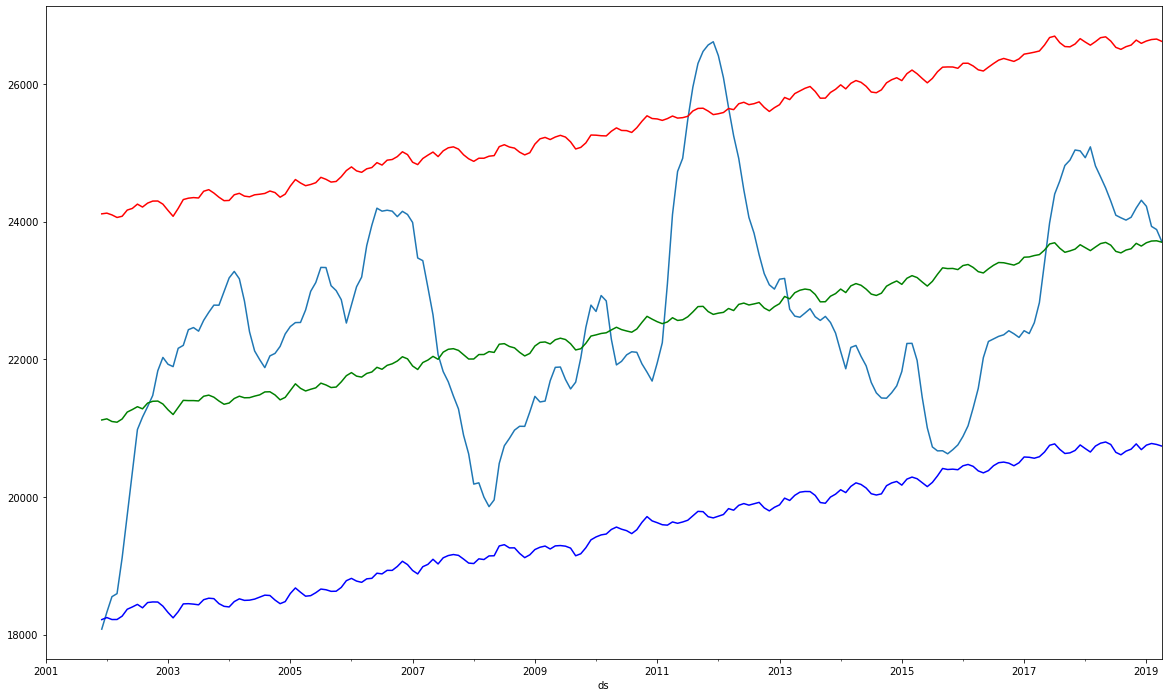

In [61]:
plt.figure(figsize = (20,12))
df_recent['Conventional Hydroelectric Power'].rolling(12).mean().plot()
pred_lower['hydro'][:'2019-04-01'].rolling(12).mean().plot(color = 'blue')
pred_mid['hydro'][:'2019-04-01'].rolling(12).mean().plot(color = 'green')
pred_upper['hydro'][:'2019-04-01'].rolling(12).mean().plot(color = 'red')

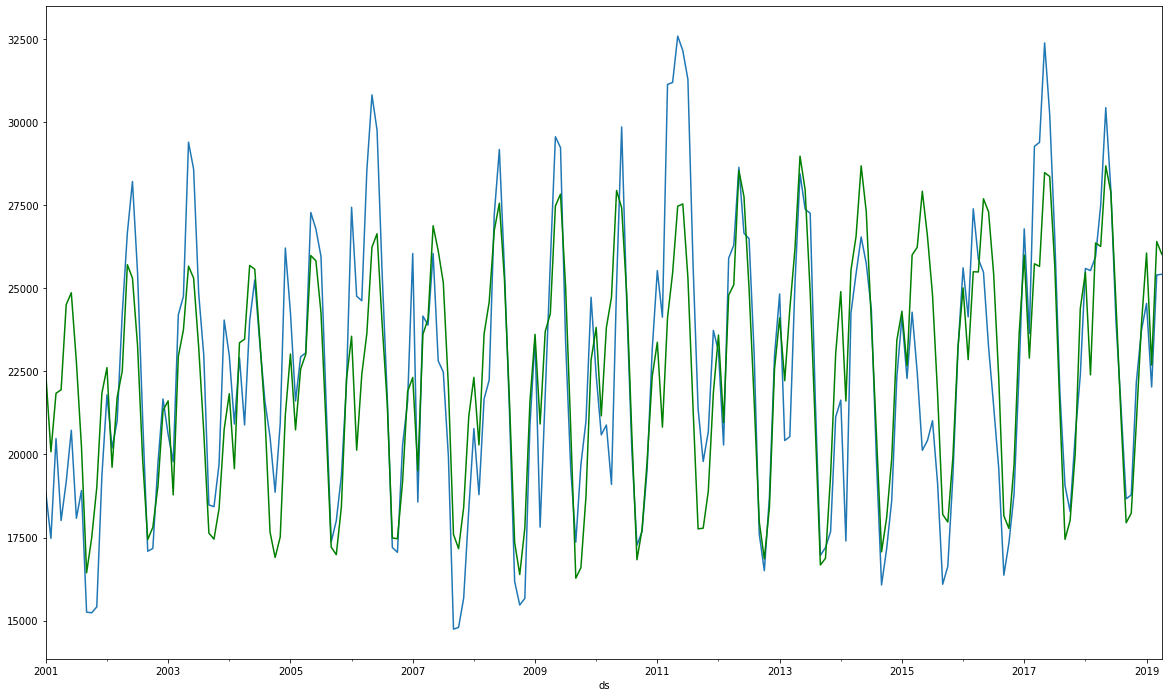

In [62]:
plt.figure(figsize = (20,12))
df_recent['Conventional Hydroelectric Power'].plot()
pred_mid['hydro'][:'2019-04-01'].plot(color = 'green')

In [63]:
metrics.r2_score(df_recent['Conventional Hydroelectric Power'],pred_mid['hydro'][:'2019-04-01'])

0.6746196510104916

In [64]:
features


['Coal',
 'Natural Gas',
 'Other Gases',
 'Nuclear',
 'Conventional Hydroelectric Power',
 'Wind',
 'Geo- thermal',
 'Solar/PV',
 'Biomass Total',
 'Petroleum',
 'Renewable Total',
 'Nonrenewable Total',
 'Total',
 'Renewable Percentage',
 'Nonrenewable Percentage']

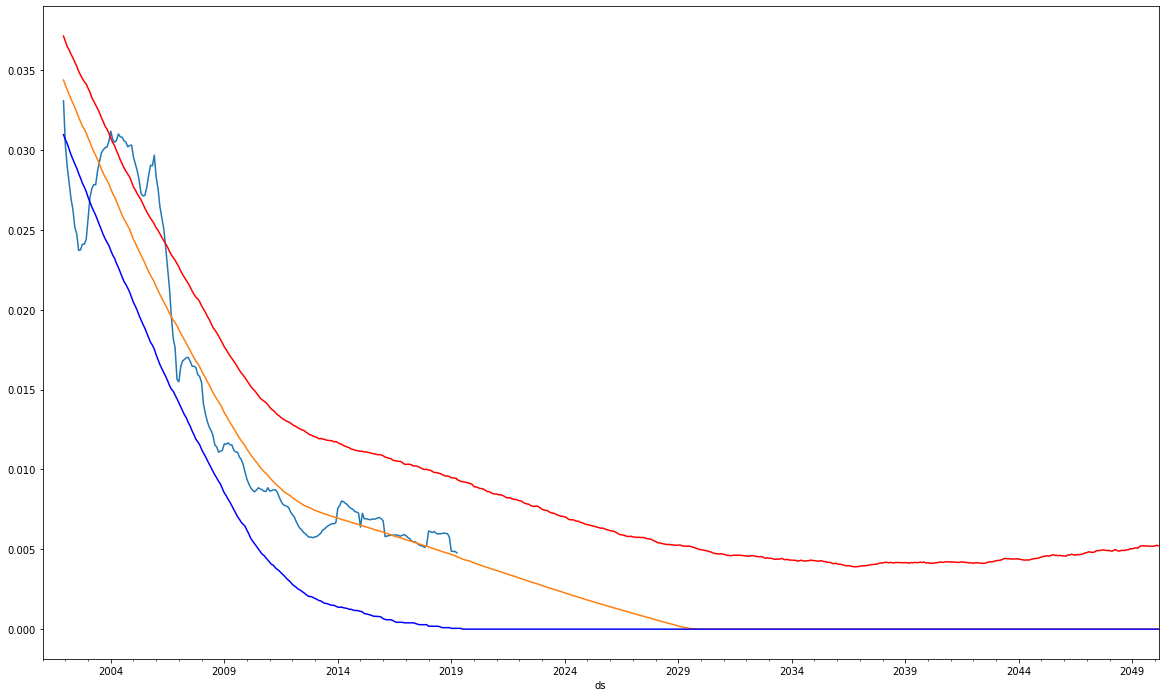

In [65]:
plt.figure(figsize = (20,12))
(df_recent['Petroleum']/df_recent['Total']).rolling(12).mean().plot()
(pred_mid['petroleum'] / pred_mid['total']).rolling(12).mean().plot()
(pred_upper['petroleum'] / pred_upper['total']).rolling(12).mean().plot(color = 'red')
(pred_lower['petroleum'] / pred_lower['total']).rolling(12).mean().plot(color = 'blue')

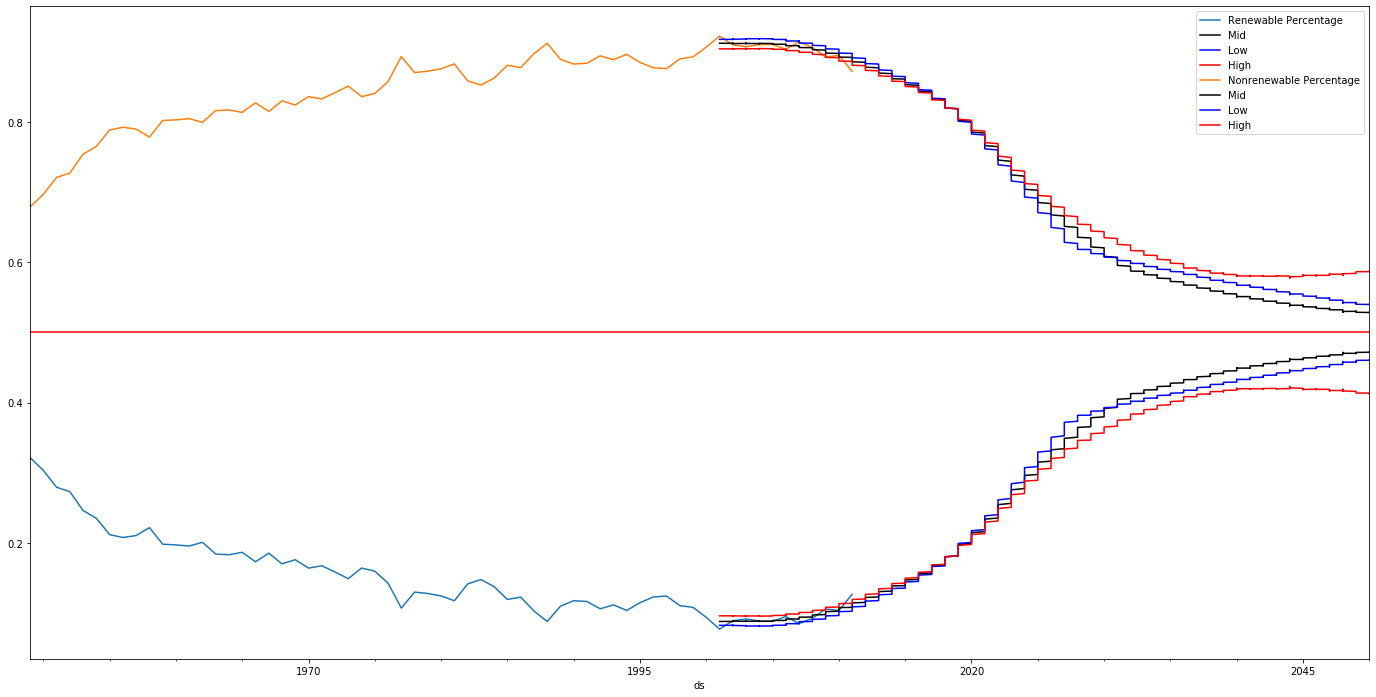

In [66]:
plt.figure(figsize = (24,12))

df_past['Renewable Percentage'].plot()
pred_mid['renewable percent'].rolling(12).mean().plot(color = 'black', label = "Mid")
pred_lower['renewable percent'].rolling(12).mean().plot(color = 'blue', label = 'Low')
pred_upper['renewable percent'].rolling(12).mean().plot(color = 'red', label = 'High')

df_past['Nonrenewable Percentage'].plot()
pred_mid['nonrenewable percent'].rolling(12).mean().plot(color = 'black', label = "Mid")
pred_lower['nonrenewable percent'].rolling(12).mean().plot(color = 'blue', label = 'Low')
pred_upper['nonrenewable percent'].rolling(12).mean().plot(color = 'red', label = 'High')

plt.axhline(0.5, color = 'red')
plt.legend()

In [67]:
pred_mid.max().sort_values()

renewable percent            0.555312
nonrenewable percent         0.928311
other                     1510.388779
geo                       2031.470484
bio                       5666.527405
petroleum                14493.017665
hydro                    33328.999580
nuclear                  84857.810925
solar                    89186.997572
wind                    190999.251422
coal                    194393.098921
ngas                    266719.717245
renewables              286044.701690
nonrenewables           367160.553070
total                   584577.702623
dtype: float64

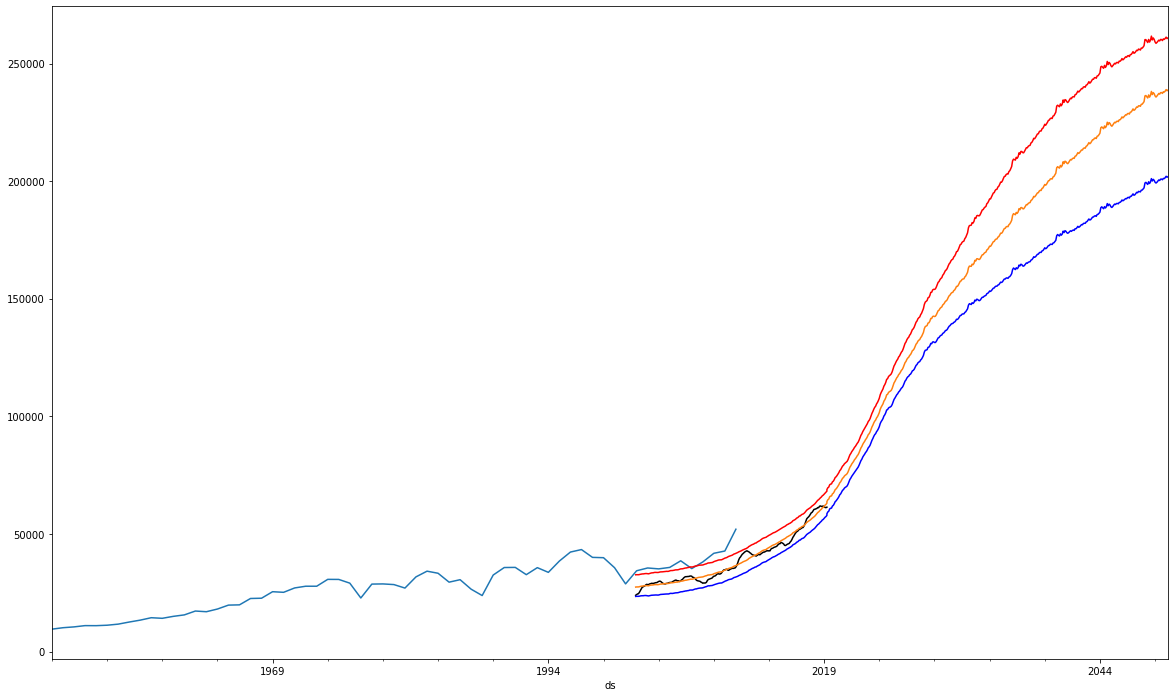

In [68]:
plt.figure(figsize = (20,12))

df_past['Renewable Total'].plot()

(df_recent['Renewable Total']).rolling(12).mean().plot(color = 'black')
(pred_mid['renewables']).rolling(12).mean().plot()
(pred_upper['renewables']).rolling(12).mean().plot(color = 'red')
(pred_lower['renewables']).rolling(12).mean().plot(color = 'blue')



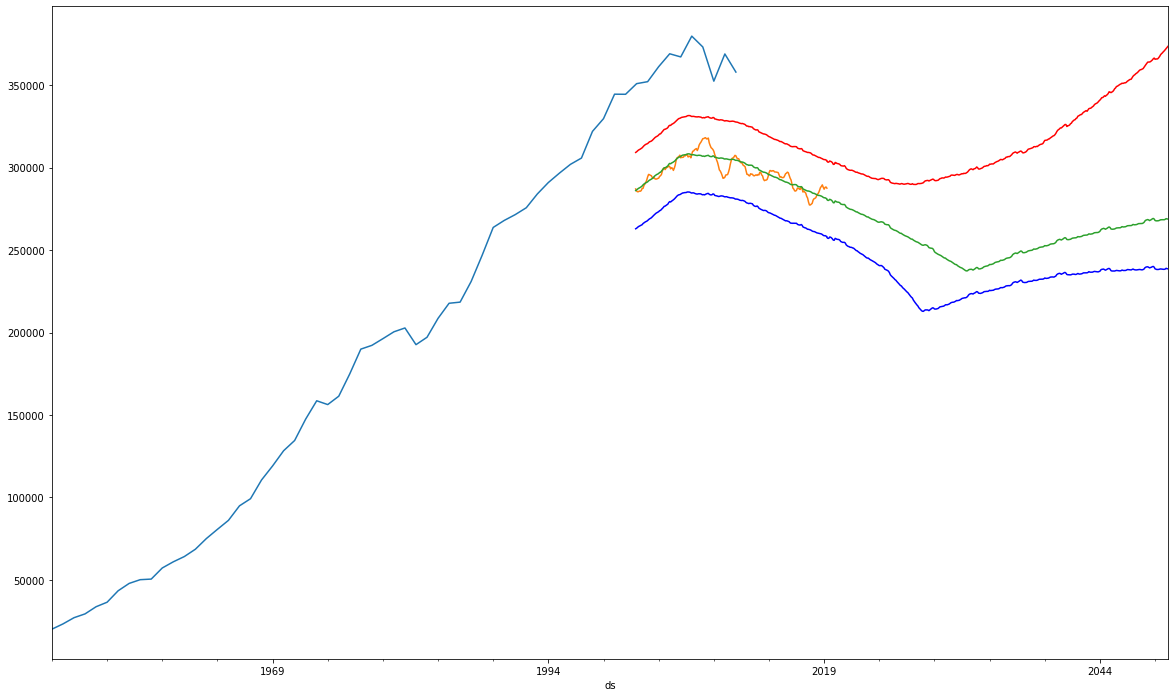

In [69]:
plt.figure(figsize = (20,12))
df_past['Nonrenewable Total'].plot()
(df_recent['Nonrenewable Total']).rolling(12).mean().plot()
(pred_mid['nonrenewables']).rolling(12).mean().plot()
(pred_upper['nonrenewables']).rolling(12).mean().plot(color = 'red')
(pred_lower['nonrenewables']).rolling(12).mean().plot(color = 'blue')

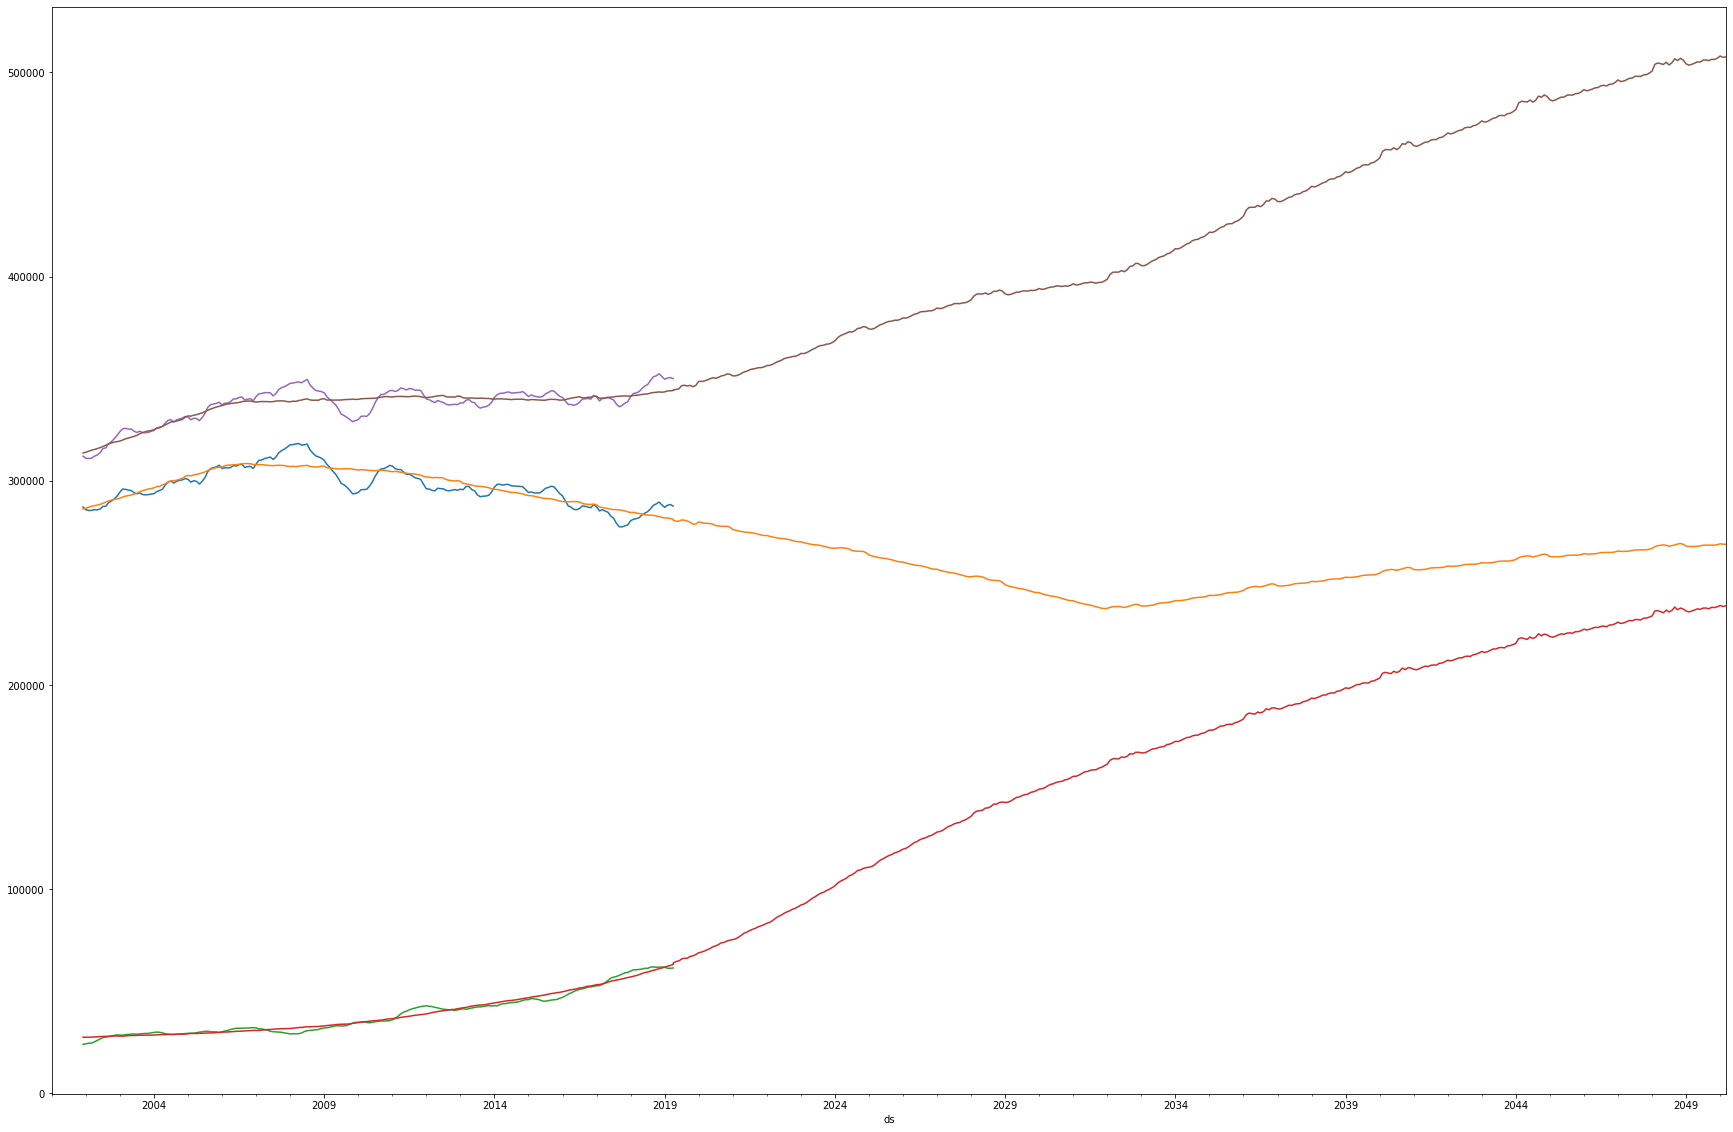

In [70]:
plt.figure(figsize = (30,20))
#df_past['Nonrenewable Total'].plot()
(df_recent['Nonrenewable Total']).rolling(12).mean().plot()
(pred_mid['nonrenewables']).rolling(12).mean().plot()
#(pred_upper['nonrenewables']).rolling(12).mean().plot(color = 'red')
#(pred_lower['nonrenewables']).rolling(12).mean().plot(color = 'blue')


#df_past['Renewable Total'].plot()

(df_recent['Renewable Total']).rolling(12).mean().plot()
(pred_mid['renewables']).rolling(12).mean().plot()
#(pred_upper['renewables']).rolling(12).mean().plot(color = 'red')
#(pred_lower['renewables']).rolling(12).mean().plot(color = 'blue')

(df_recent['Total']).rolling(12).mean().plot()
#df_past['Total'].plot()
pred_mid['total'].rolling(12).mean().plot()

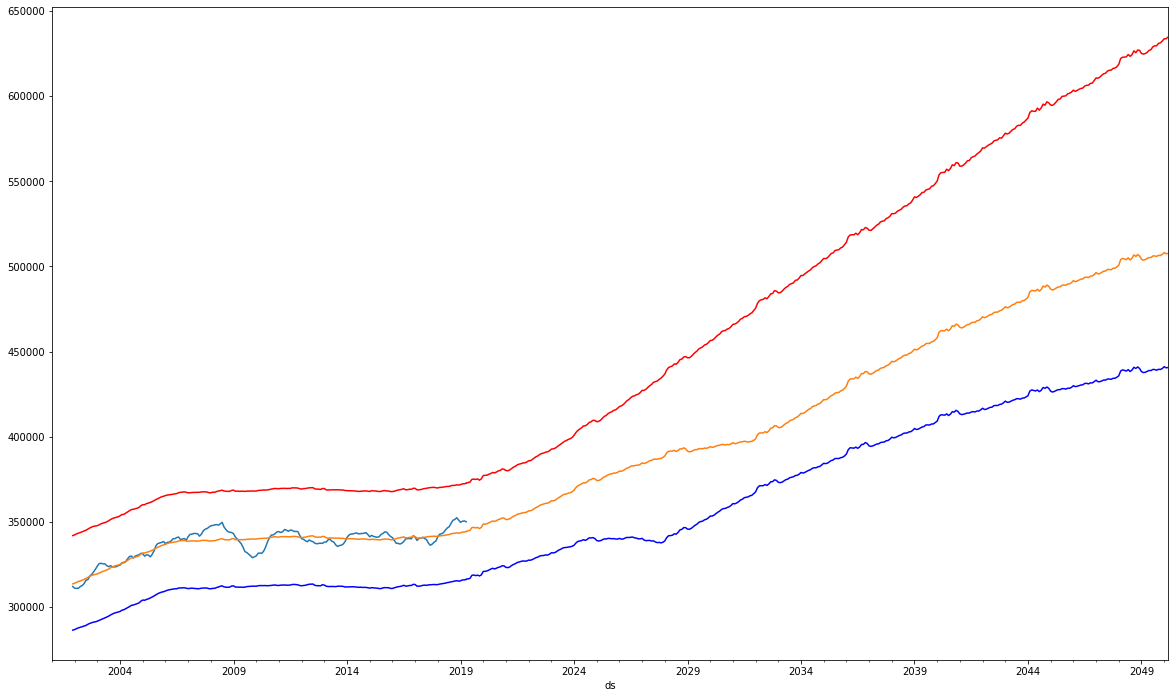

In [71]:
plt.figure(figsize = (20,12))
(df_recent['Total']).rolling(12).mean().plot()
(pred_mid['total']).rolling(12).mean().plot()
(pred_upper['total']).rolling(12).mean().plot(color = 'red')
(pred_lower['total']).rolling(12).mean().plot(color = 'blue')

## THINGS I NEED TO DO NEXT:

- Clean everything up, add titles and explanations to things
- Make presentation
- Find some way to validate findings - right now it looks like my model could suffer from overfitting but I don't quite know for sure 
- Put everything into a giant pile of an executable file and make it so I can run it in a shell script to update a whole bunch of things that I will need and generate a new set of predictions
- Generalize some things so that you're not just rewriting code all over the place, put it in a .py file with the rest of the repo and SPRUCE THAT SHIT UP to make it look clean and professional
- Comment on things that I do! Especially the cleaning and modeling things. 
- fix up the SARIMAX and RNN sections in the Wind and Coal notebooks to be more than just minor dalliances. 
- maybe do a full scale modeling? Just to see. 

AIC AND BIC - Optimization criteria for gridsearch

In [75]:
pred_lower.to_csv('../data/lower_predictions.csv', index = True)
pred_mid.to_csv('../data/midrange_predictions.csv', index = True)
pred_upper.to_csv('../data/upper_predictions.csv', index = True)